I was inspired by this thread (https://twitter.com/jon_mellon/status/899663861976113152) - expanded on in this paper (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3022169) - to look at the ways in which Authoritarianism isn't so much a political value itself but a reflection of psychological differences which mediate the connection between an individual's personal Circumstances and their Attitudes to related issues.

I've constructed a series of charts each looking at the interaction between the Circumstances of the respondents (e.g. Gross Household Income) and some related political Attitudes (e.g. Redistribution) - plotting Circumstances on the x-axis and the respective (weighted, error-barred) means of those Attitudes on the y-axis.

Strictly speaking, each of those charts is 5 charts, each built using the fifths of the British Election Study (Wave 17) dataset who answered both questions.

Those fifths reflect the population of the dataset ordered by where they are on the Social Liberal - Authoritarian axis[1].

The interactive slider lets you see the how the chart changes for different fifths. That's it - no other controls.

Where the x-axis variables are ordered, I've added a regression line/slope-label - just to help the eye.


[1] using a homebrew mix incorporating all al variables across the dataset, hence why I have even fifths

In [1]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')



Toggle code

var_type (7911, 14)
Wall time: 27.2 s


In [2]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()

pan_dataset_allr_values = pan_dataset_allr_values.set_index("id").loc[BES_Panel.index]

In [15]:
wave_to_name = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]

In [3]:
def weighted_mean(x):
    if x.empty:
        return np.nan    
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

import numba

def weighted_mean_bstrap(x,size):
    if x.empty:
        return np.nan
    val, weight = map(np.asarray, zip(*x))
    return wt_mean(val,weight,size)

@numba.jit
def wt_mean(val, weight,size):
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]

    bs_reps = np.empty(size)

    # Draw replicates
    n = len(val)
    for i in range(size):
        ind = np.random.choice(range(0,n), size=n)
        bs_reps[i] = (val[ind] * weight[ind]).sum() / weight[ind].sum()
        
    return bs_reps

def wt_err(x,size,conf_int = [2.5,97.5]):
    lower,upper = np.percentile( weighted_mean_bstrap(x,size) , conf_int)
    return (lower,upper)

In [4]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
lr_col = pan_dataset_allr_values.columns[2]
al_col = pan_dataset_allr_values.columns[3]

from holoviews import dim
from scipy import stats

In [16]:
import textwrap

def hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var, al_var_name="al",
                             zlabel=None,q=5,x_cat_list=None,non_ord_indices=[],reg_plot=True,
                             title=None,x_cat_text_width=13):
    if title is None:
        title = '{label} {group}\n{dimensions}'
    else:
        title = title+"\n"+'{label} {group}\n{dimensions}'
    
    if zlabel is None:
        zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"

    df = BES_Panel[[x_var_name,wt_var]]
    if x_cat_list is None:
        x_cat_list = BES_Panel[x_var_name].cat.categories

        wrapper = textwrap.TextWrapper(width=x_cat_text_width) 
        x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]   
        
    if non_ord_indices==[] and "Don't know" in x_cat_list:
        non_ord_indices.append(  list( x_cat_list ).index("Don't know") )        
    
    hv_dict = {}

    mask = BES_Panel[wt_var].notnull() & BES_Panel[x_var_name].notnull() & pan_dataset_allr_values[[lr_col,al_col]].notnull().all(axis=1)
    lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
    al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

    df = df[mask]
    df[al_var_name] = al
    df[y_var_name] = lr

    df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
    max_y_value=df[y_var_name].max()
    df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
    df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


    for al_var in range(0,q):
        mask = df[al_var_name]==al_var
        means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
        wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
        lower = wt_mean_errors.apply(lambda x: x[0])
        upper = wt_mean_errors.apply(lambda x: x[1])
        count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

        chart_df = pd.DataFrame()
        chart_df["means"]=means
        chart_df["lower_error"]=lower
        chart_df["upper_error"]=upper
        chart_df["N"]=count
    #     chart_df

        chart_df = chart_df.reset_index()
        chart_df[x_var_name] = chart_df[x_var_name].cat.codes
        chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
        chart_df["lower_error"] = chart_df["lower_error"].abs()

        chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])


        non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
        xs = chart_df[x_var_name][non_ord_mask]
        ys = chart_df["means"][non_ord_mask]

        slope, intercep, rval, pval, std = stats.linregress(xs, ys)
        # rho, pval = stats.spearmanr(xs,ys)
    #     xs = np.linspace(0,14,2)
        if reg_plot:
            reg = slope*xs+intercep
            chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
        chart.opts(ylim=(0,max_y_value),xlim=(-.1,len(x_cat_list)-.9),
                  xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
                  fig_size=300,aspect=2,    
                  xlabel =xlabel, ylabel=ylabel,
                  title = title)
    #xrotation=45,
        hv_dict[al_var] = chart
    return hv_dict,zlabel

In [92]:
import textwrap

def hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var, al_var_name="al",
                             zlabel=None,q=5,x_cat_list=None,non_ord_indices=[],reg_plot=True,
                             title=None,x_cat_text_width=13):
    
    if title is None:
        title = '{label} {group}\n{dimensions}'
    else:
        title = title+"\n"+'{label} {group}\n{dimensions}'
    
    if zlabel is None:
        zlabel = "Social Liberal (0) - Authoritarian ("+str(q-1)+")"

    df = BES_Panel[[x_var_name,wt_var]]
    if x_cat_list is None:
        x_cat_list = BES_Panel[x_var_name].cat.categories

        wrapper = textwrap.TextWrapper(width=x_cat_text_width) 
        x_cat_list = [wrapper.fill(text=x)  for x in x_cat_list]          
    
    if non_ord_indices==[] and "Don't know" in x_cat_list:
        non_ord_indices.append( list( x_cat_list ).index("Don't know") )
    
    hv_dict = {}

    mask =  BES_Panel[wt_var].notnull() &\
            BES_Panel[x_var_name].notnull() &\
            pan_dataset_allr_values[al_col].notnull()&\
            BES_Panel[y_var_name].replace("Don't know",np.nan).notnull()

    # lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_var][mask],q )
    al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_var][mask],q )

    df = BES_Panel[[x_var_name,wt_var]][mask]
    df[al_var_name] = al
    df[y_var_name] = BES_Panel[y_var_name]

    df[y_var_name] = df[y_var_name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).astype('float32')
    max_y_value=df[y_var_name].max()
    df[al_var_name] = df[al_var_name].cat.codes.replace(-1,np.nan).astype('float32')
    df[y_var_name+"_wts"] = list(zip(df[y_var_name],df[wt_var]))


    for al_var in range(0,q):
        mask = df[al_var_name]==al_var
        means = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(weighted_mean)
        wt_mean_errors = df[mask].groupby(x_var_name)[y_var_name+"_wts"].agg(wt_err, size=1000)
        lower = wt_mean_errors.apply(lambda x: x[0])
        upper = wt_mean_errors.apply(lambda x: x[1])
        count = df[mask].groupby(x_var_name)[y_var_name+"_wts"].count()

        chart_df = pd.DataFrame()
        chart_df["means"]=means
        chart_df["lower_error"]=lower
        chart_df["upper_error"]=upper
        chart_df["N"]=count
    #     chart_df

        chart_df = chart_df.reset_index()
        chart_df[x_var_name] = chart_df[x_var_name].cat.codes
        chart_df[["lower_error","upper_error"]] = chart_df[["lower_error","upper_error"]].apply(lambda x: x-chart_df["means"])
        chart_df["lower_error"] = chart_df["lower_error"].abs()

        chart = hv.Curve(chart_df) * hv.ErrorBars(chart_df, vdims=['means', 'lower_error', 'upper_error'])


        non_ord_mask = chart_df[x_var_name].apply(lambda x: x not in non_ord_indices)
        xs = chart_df[x_var_name][non_ord_mask]
        ys = chart_df["means"][non_ord_mask]

        slope, intercep, rval, pval, std = stats.linregress(xs, ys)
        # rho, pval = stats.spearmanr(xs,ys)
    #     xs = np.linspace(0,14,2)
        if reg_plot:
            reg = slope*xs+intercep
            chart = chart * hv.Curve((xs, reg)).relabel('r2: %.3f' % (slope) )    
        chart.opts(ylim=(0,max_y_value+.1),xlim=(-.1,len(x_cat_list)-.9),
                  xticks= [(x,x_cat_list[x]) for x in range(0,len(x_cat_list))],
                  fig_size=300,aspect=2,    
                  xlabel =xlabel, ylabel=ylabel,
                  title = title)
    #xrotation=45,
        hv_dict[al_var] = chart
    return hv_dict,zlabel

In [1]:
y_var_name = "lr"

title = "\n".join(["Economic Left-Right Value Position",
                   "(BES Wave 17, September 2019, fully weighted)"])
ylabel = "Economic Left (0) - Economic Right ("+str(q-1)+")"
wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

hv_dict = hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

NameError: name 'hol_plot_var_by_lr_by_al' is not defined

Wall time: 12.8 s


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_109 :Curve   [x]   (y)
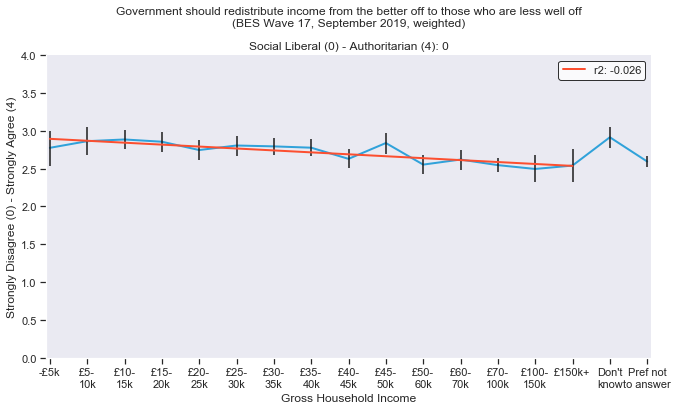
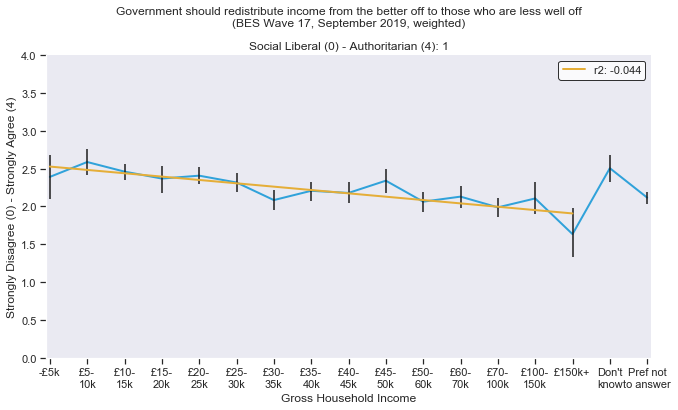
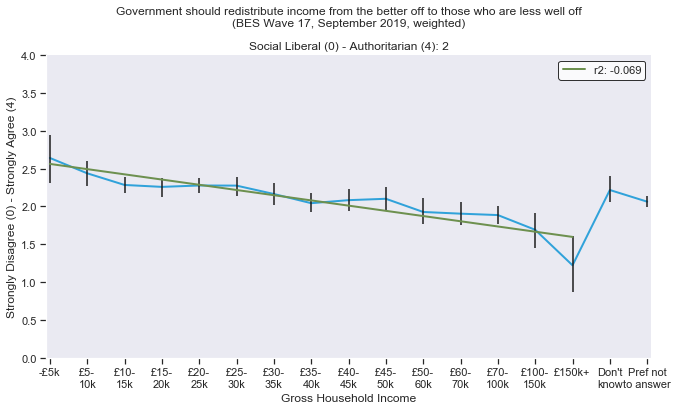
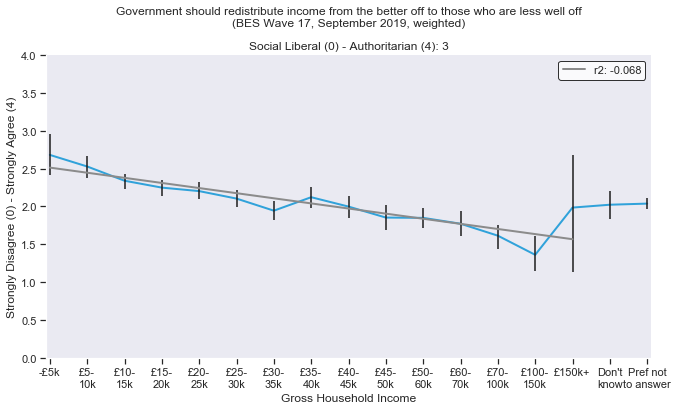
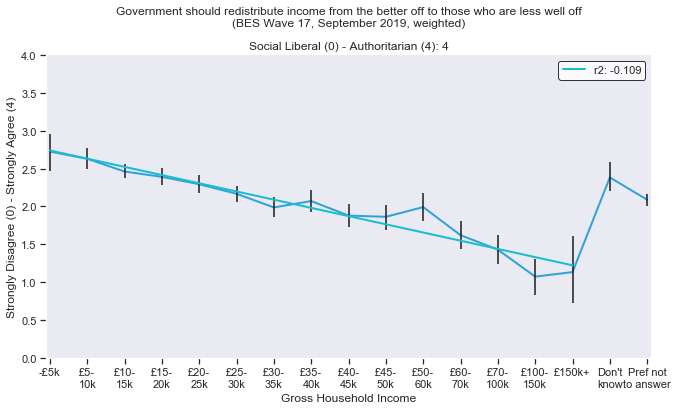

In [60]:
%%time
          
y_var_name = "lr1W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])
ylabel = "Strongly Disagree (0) - Strongly Agree (4)"

wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [115]:
# compare with this BES vanilla al_scale, add new column to pan_dataset_allr_values, change al_col to match
# 'Social: Liberalism <-> Conservatism{gaussian-ish}'
# al_col

# pan_dataset_allr_values[al_col]
al_col = "al_scaleW17"
pan_dataset_allr_values[al_col] = BES_Panel[al_col].cat.codes.replace(-1,np.nan)

# it passes - just possible it's *slightly* cleaner with al_scale

Wall time: 12.1 s


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_gross_householdW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_gross_householdW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_111 :Curve   [x]   (y)
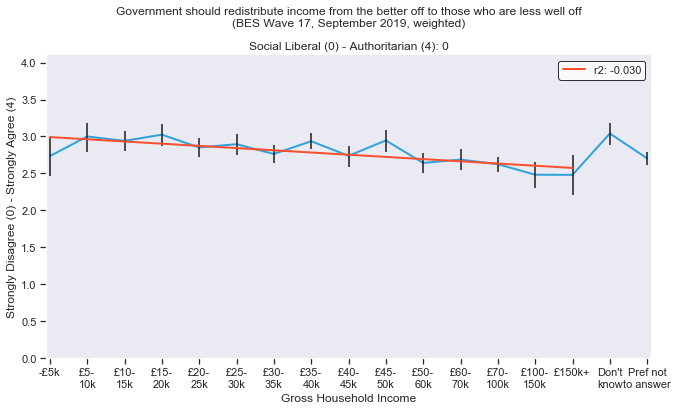
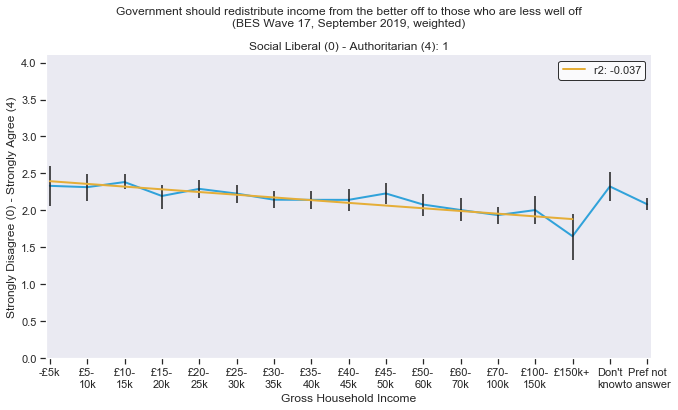
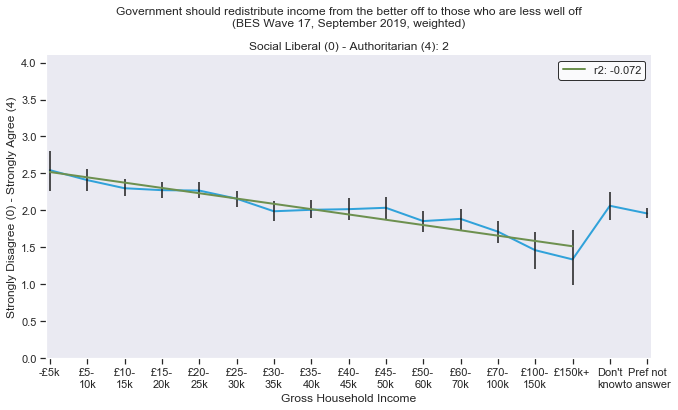
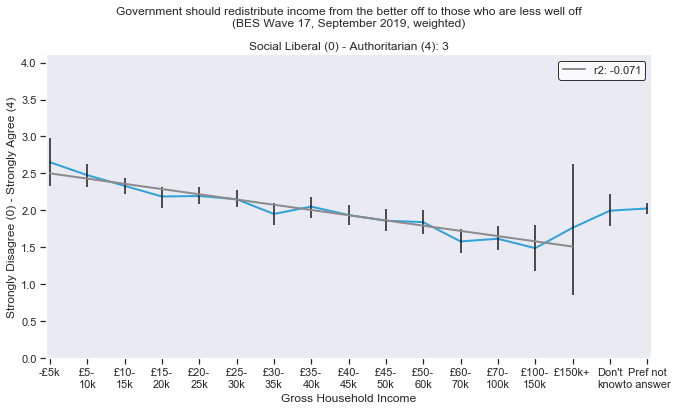
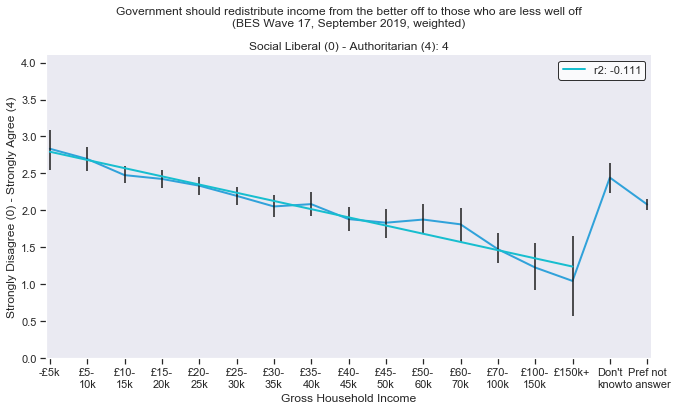

In [117]:
%%time
          
y_var_name = "lr1W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])
ylabel = "Strongly Disagree (0) - Strongly Agree (4)"

wt_var = "wt_new_W17"

x_var_name = "p_gross_householdW17"
xlabel = "Gross Household Income"

x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
"£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = [15,16]

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   q=5,x_cat_list=x_cat_list,non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

al_col = 'Social: Liberalism <-> Conservatism{gaussian-ish}'

In [68]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'Income_by_Redist_by_Auth.gif', fps=1)


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [p_socgradeW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [p_socgradeW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_170 :Curve   [x]   (y)
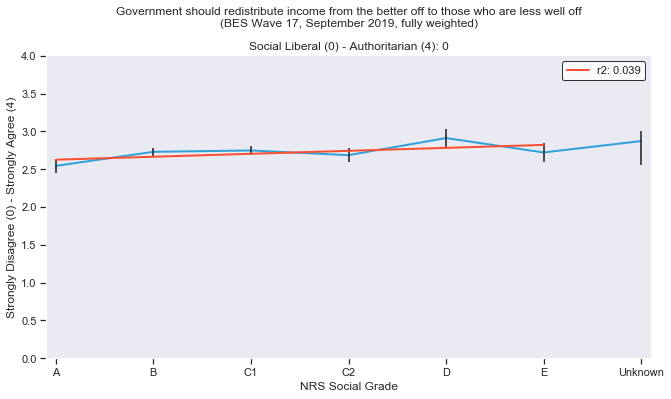
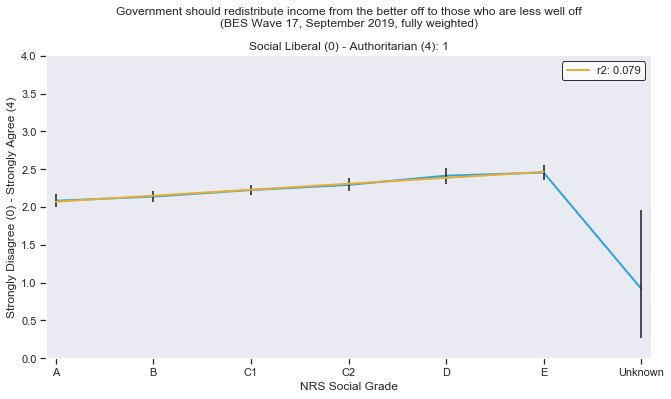
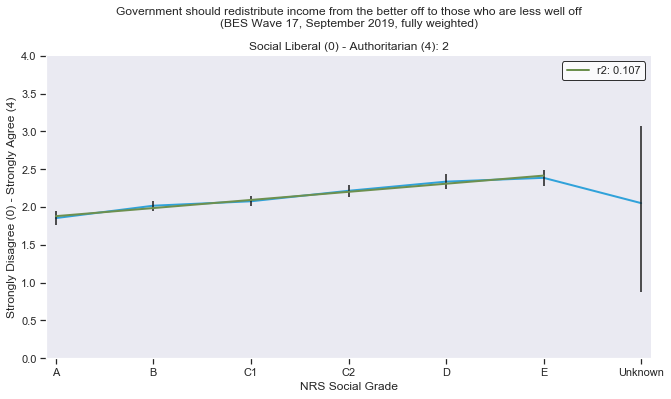
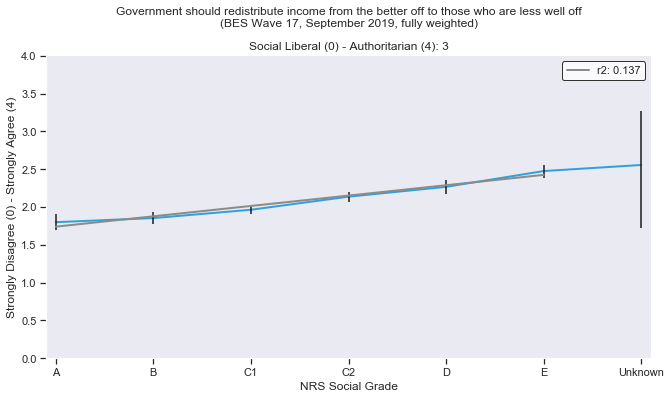
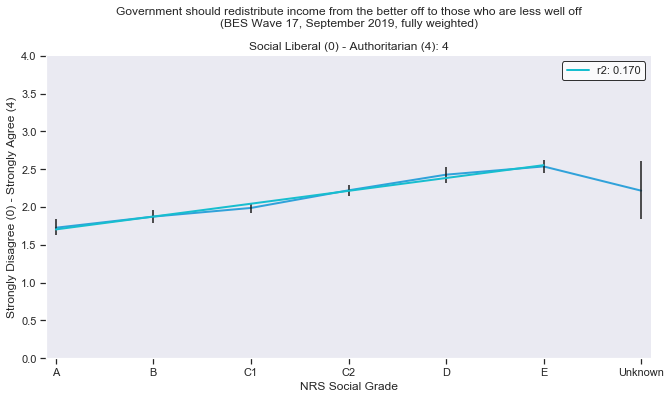

In [55]:
y_var_name = "lr1W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])

ylabel = "Strongly Disagree (0) - Strongly Agree (4)"
    
wt_var = "wt_new_W17"

x_var_name = "p_socgradeW17"
xlabel = "NRS Social Grade"
non_ord_indices = [6]

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [p_edlevelW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [p_edlevelW17]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_121 :Curve   [x]   (y)
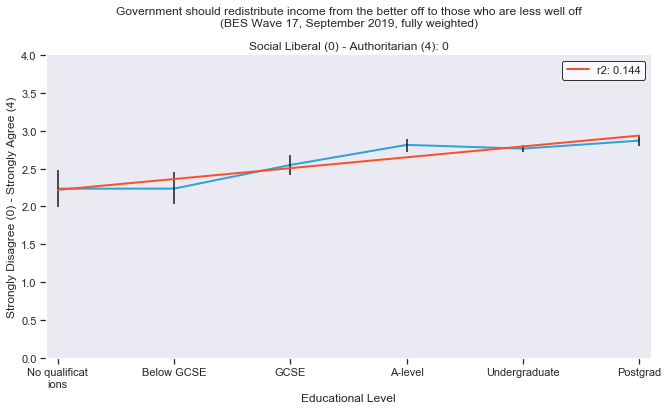
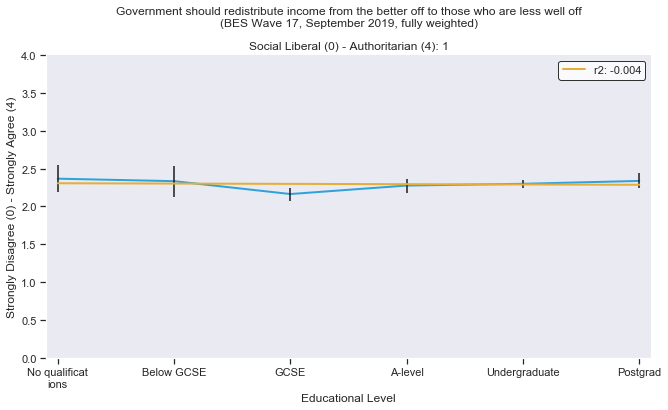
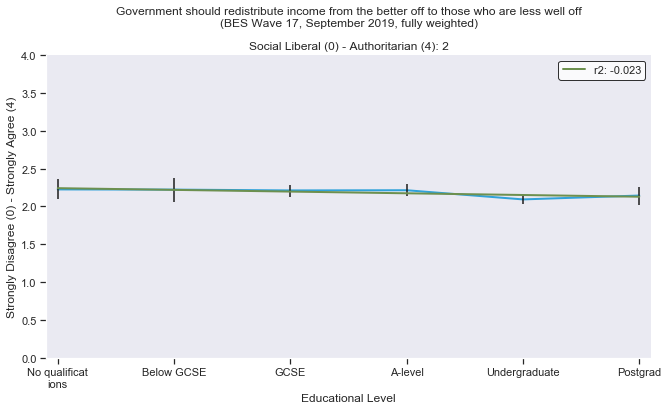
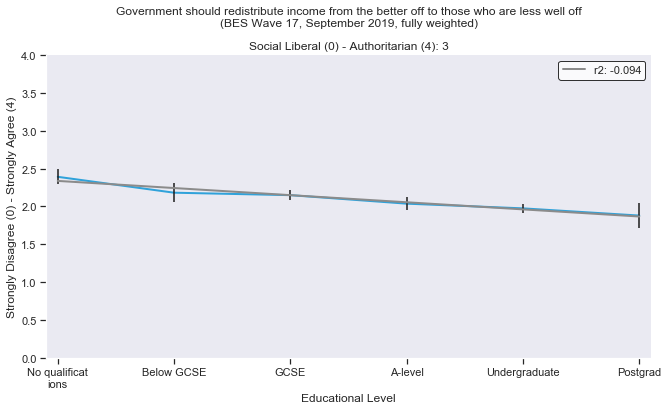
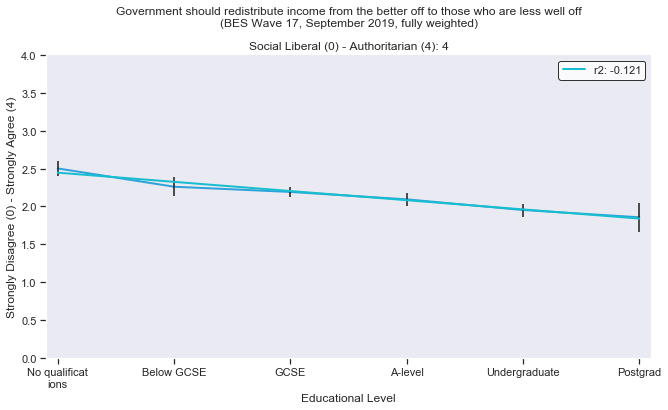

In [56]:
y_var_name = "lr1W17"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])

ylabel = "Strongly Disagree (0) - Strongly Agree (4)"
    
wt_var = "wt_new_W17"

x_var_name = "p_edlevelW17"
xlabel = "Educational Level"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      x_cat_text_width=16)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                        :Curve   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error,N)
      .ErrorBars.I                    :ErrorBars   [ns_sec_analyticW16W17W18]   (means,lower_error,upper_error)
      .Curve.R2_colon_0_full_stop_143 :Curve   [x]   (y)
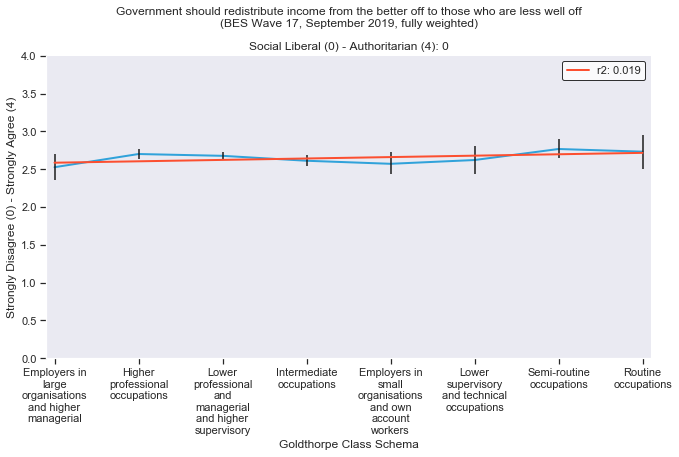
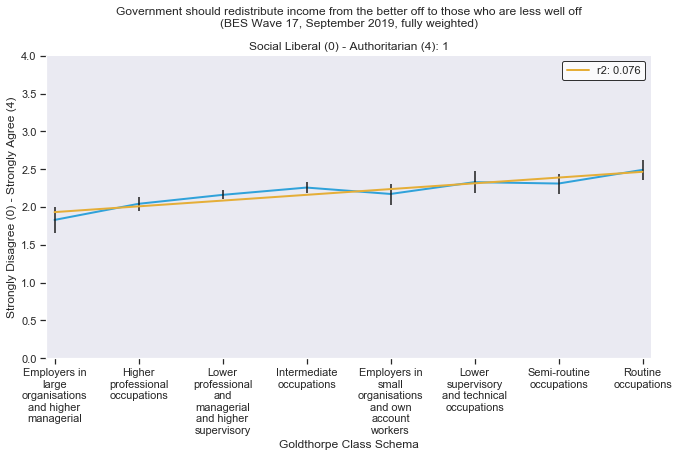
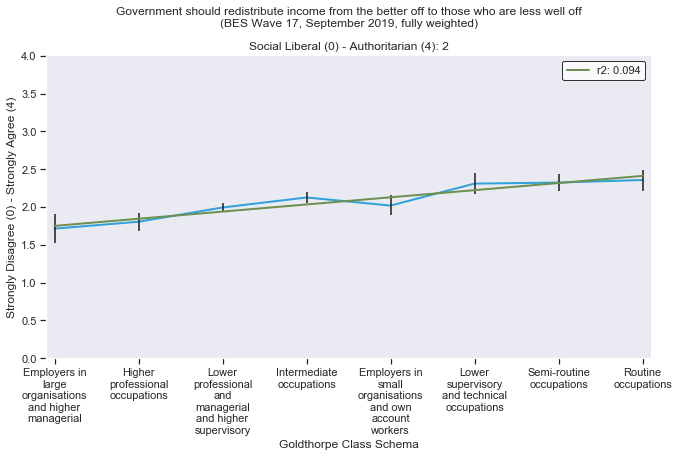
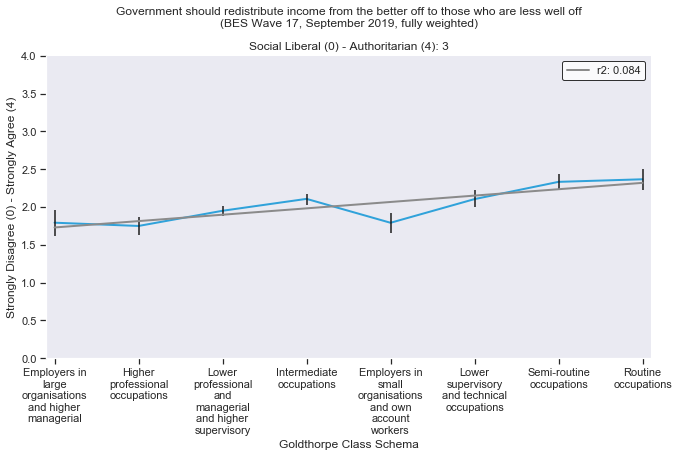
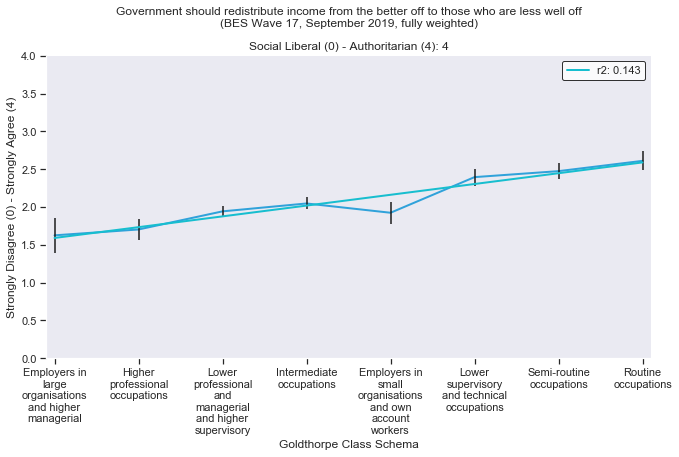

In [57]:
y_var_name = "lr1W17"
# title ="Government should redistribute income from the better off to those who are less well off\n"
title = "\n".join(["Government should redistribute income from the better off to those who are less well off",
                   "(BES Wave 17, September 2019, weighted)"])

ylabel = "Strongly Disagree (0) - Strongly Agree (4)"
    
wt_var = "wt_new_W17"

x_var_name = "ns_sec_analyticW16W17W18"
xlabel = "Goldthorpe Class Schema"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW17]   (means,lower_error,upper_error)
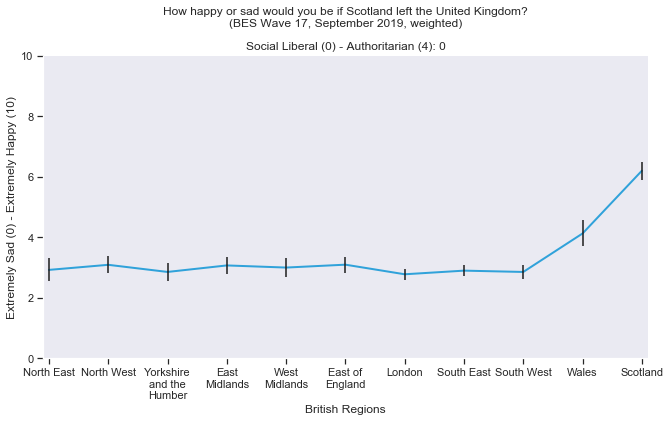
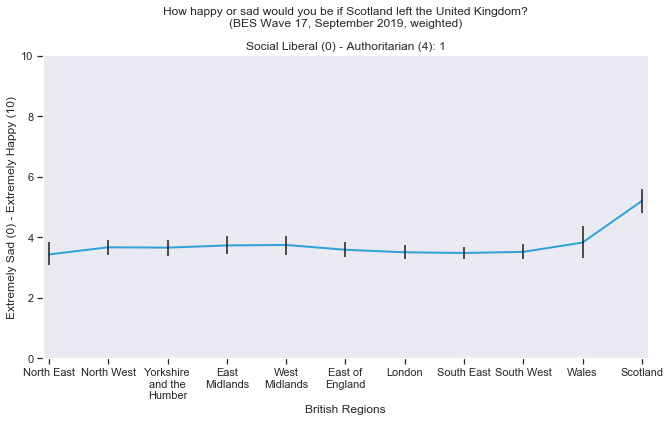
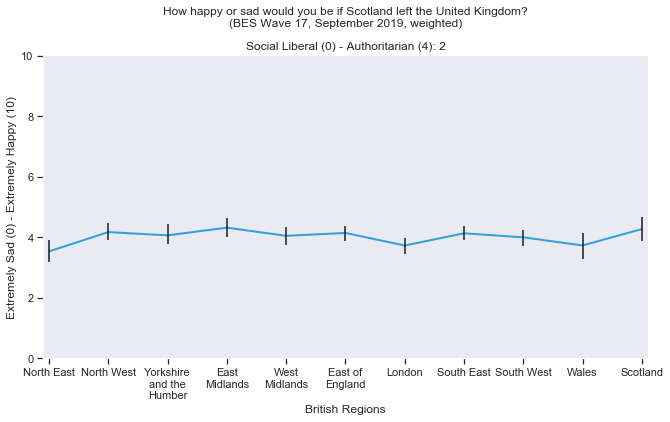
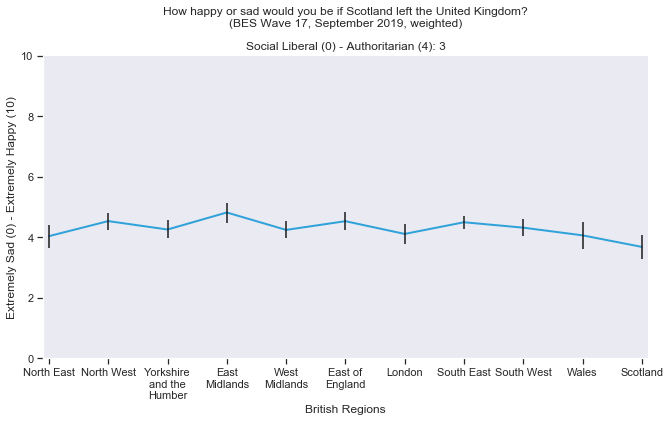
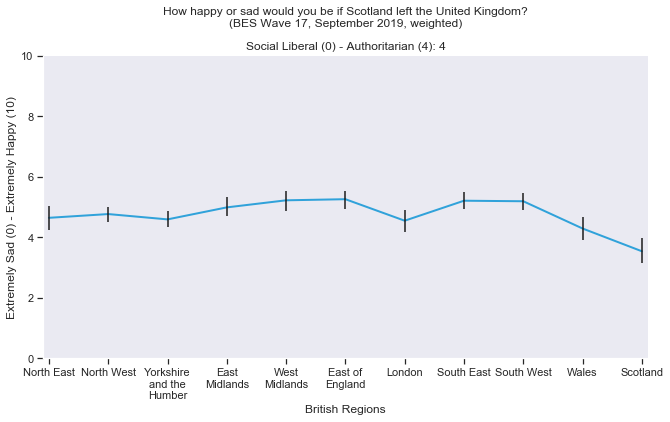

In [81]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 17, September 2019, weighted)"])

y_var_name = "happyScotIndepResultW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "gorW17"
xlabel = "British Regions"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW11]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW11]   (means,lower_error,upper_error)
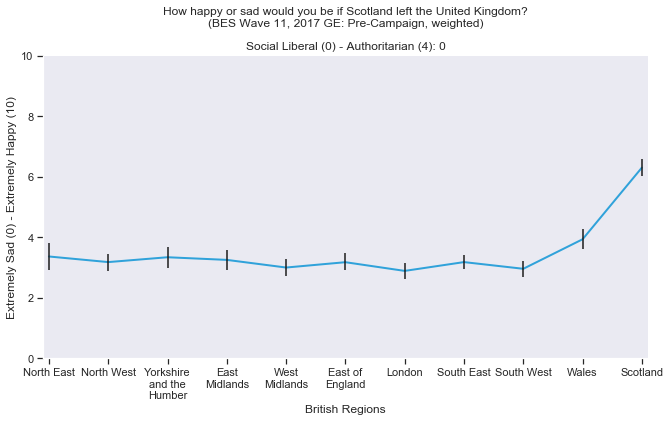
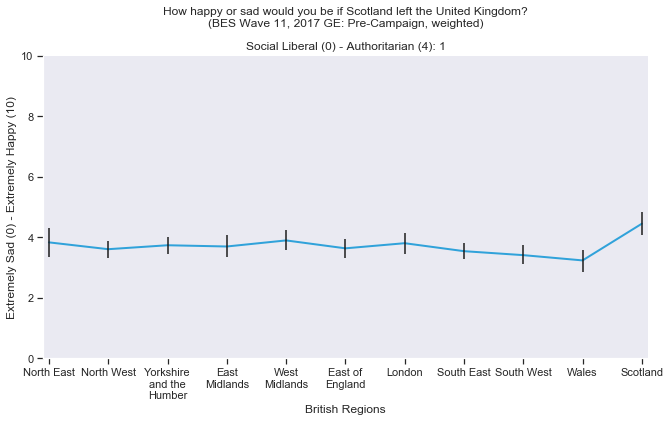
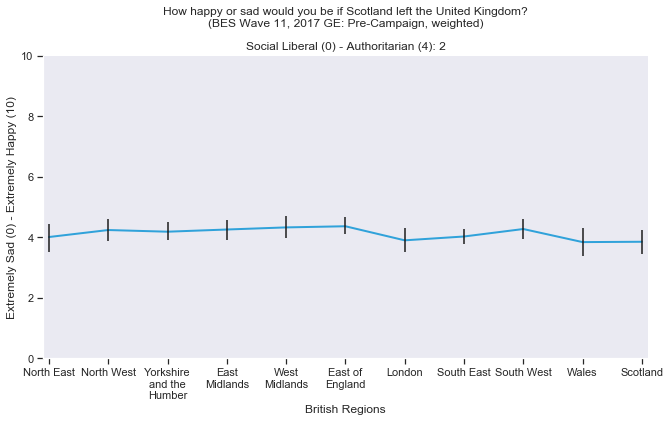
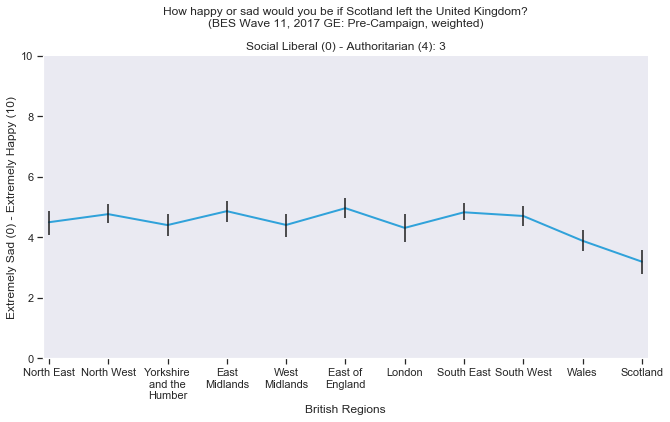
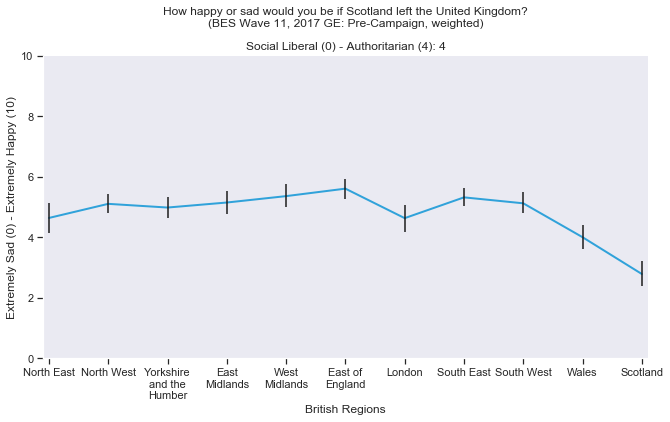

In [19]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 11, "+wave_to_name.loc[11]+", weighted)"])

y_var_name = "happyScotIndepResultW11"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W11"

x_var_name = "gorW11"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW3]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW3]   (means,lower_error,upper_error)
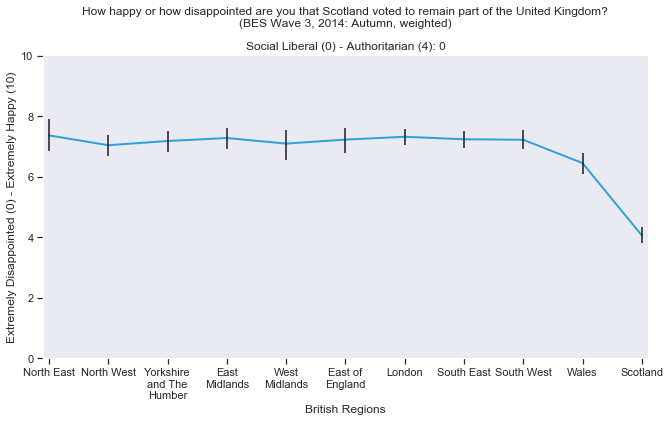
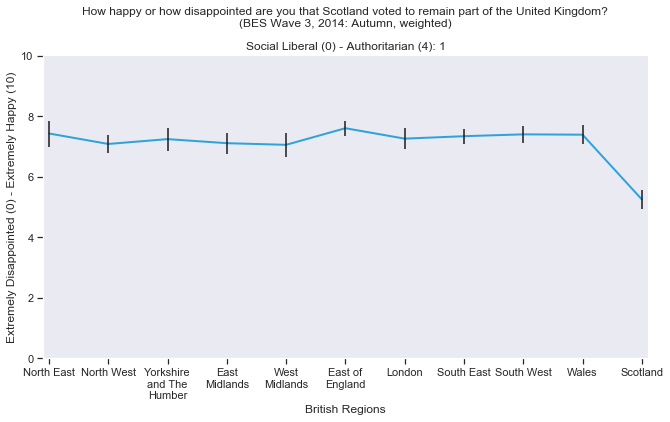
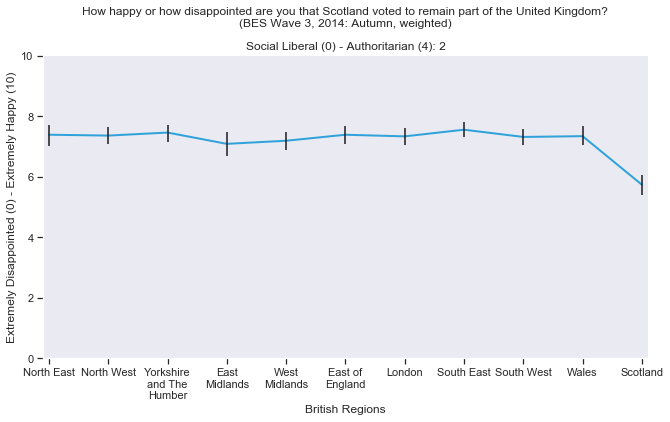
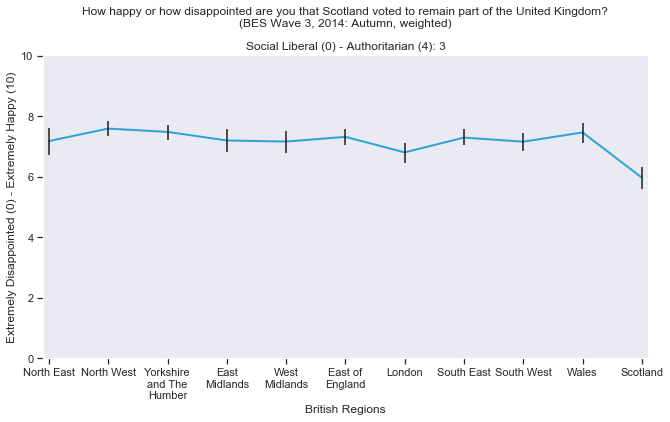
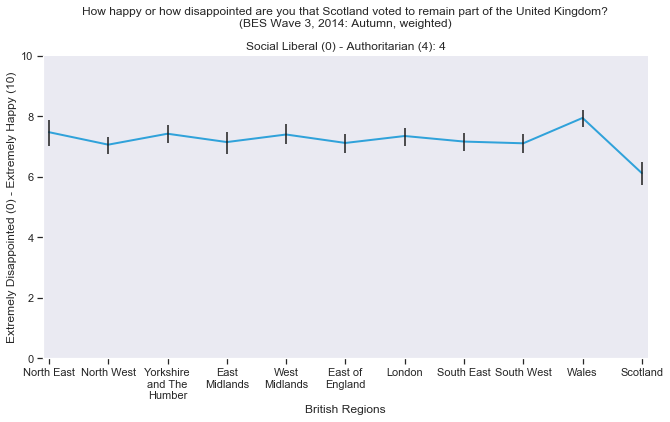

In [27]:
title = "\n".join(["How happy or how disappointed are you that Scotland voted to remain part of the United Kingdom?",
                   "(BES Wave 3, "+wave_to_name.loc[3]+", weighted)"])

y_var_name = "happyScotIndepResultNoW3"
ylabel = "\n".join(["Extremely Disappointed (0) - Extremely Happy (10)"])
    
wt_var = "wt_full_W3"

x_var_name = "gorW3"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [29]:
# 

In [65]:
BES_Panel["happyNIIndepResultScaleW17"].cat.rename_categories(['Extremely sad', '1.0', '2.0', '3.0', '4.0', '5.0',
                                                               '6.0', '7.0', '8.0', '9.0', 'Extremely happy', "Don't know"],
                                                               inplace=True)
BES_Panel["happyWalesIndepResultScaleW17"].cat.rename_categories(['Extremely sad', '1.0', '2.0', '3.0', '4.0', '5.0',
                                                               '6.0', '7.0', '8.0', '9.0', 'Extremely happy', "Don't know"],
                                                               inplace=True)

In [67]:
# BES_Panel["happyNIIndepResultScaleW17"]

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW17]   (means,lower_error,upper_error)
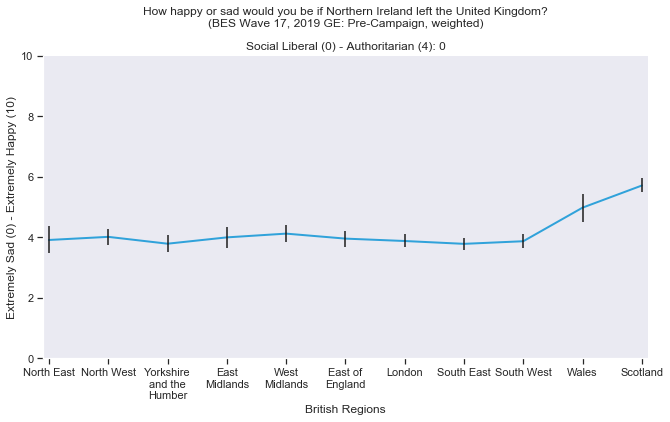
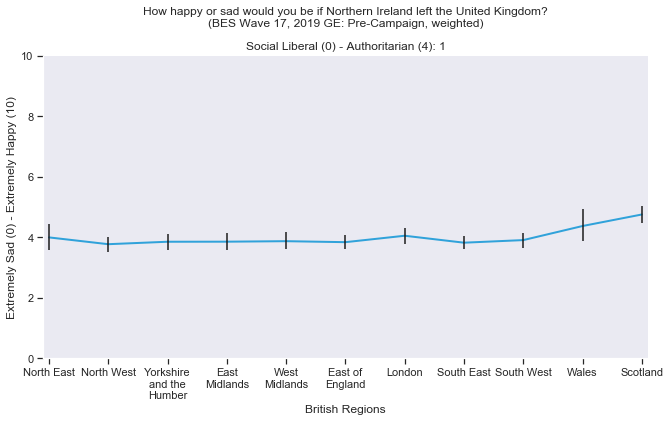
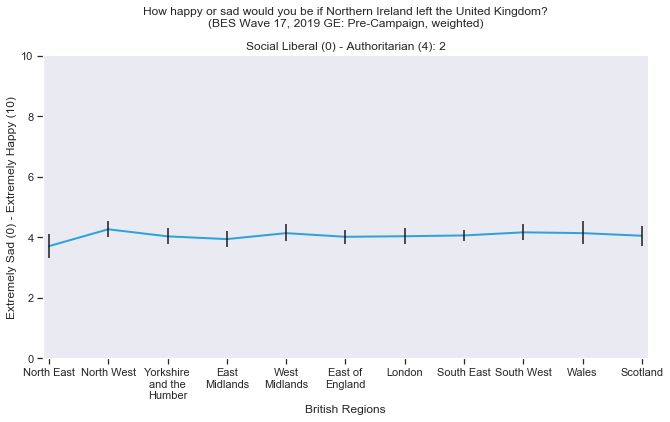
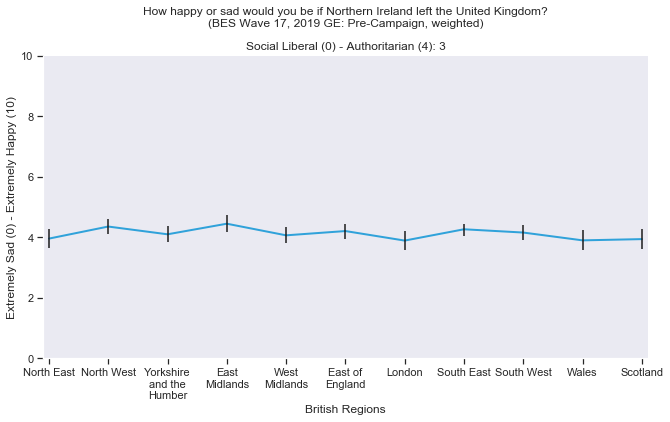
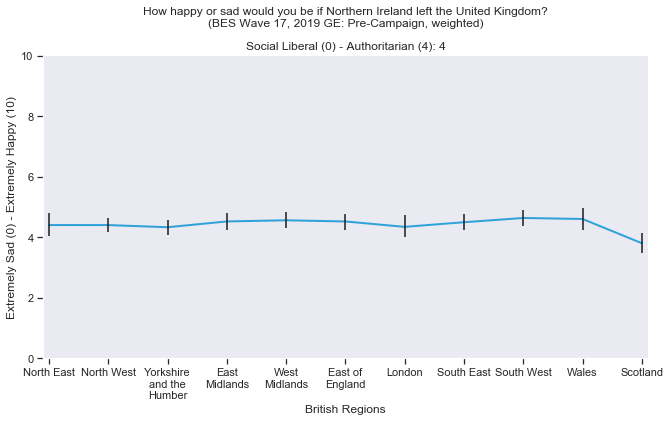

In [68]:
title = "\n".join(["How happy or sad would you be if Northern Ireland left the United Kingdom?",
                   "(BES Wave 17, "+wave_to_name.loc[17]+", weighted)"])

y_var_name = "happyNIIndepResultScaleW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "gorW17"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW17]   (means,lower_error,upper_error)
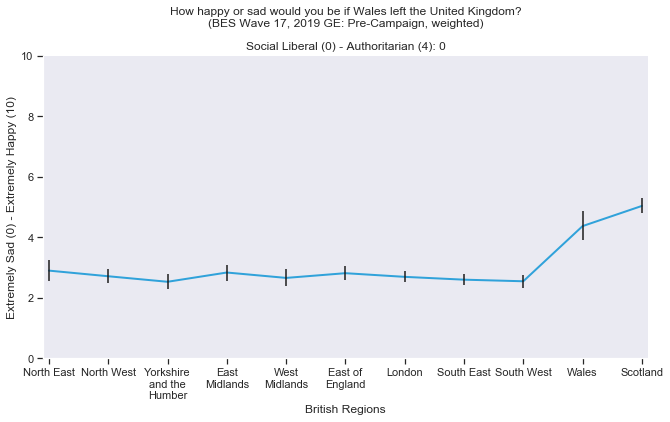
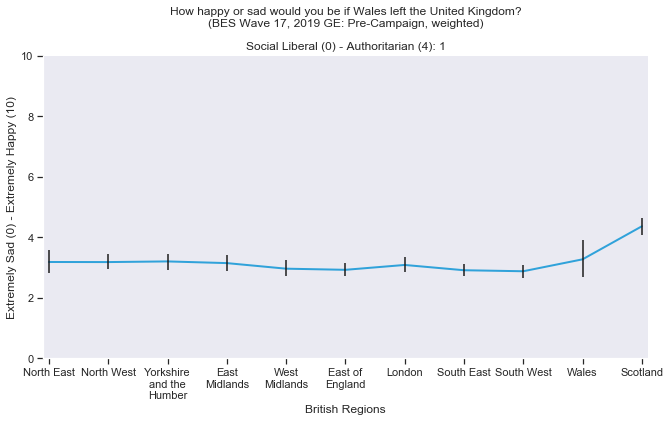
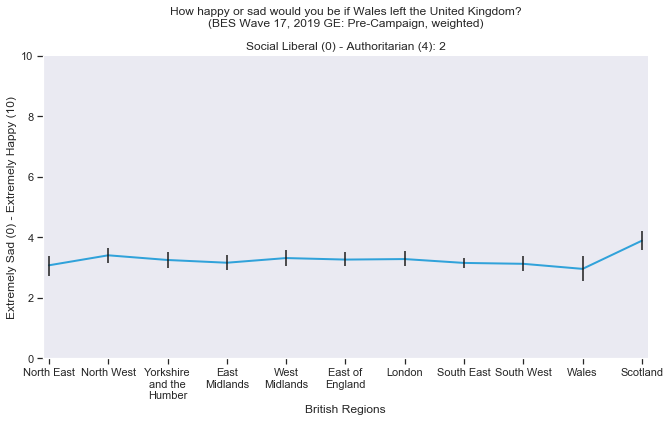
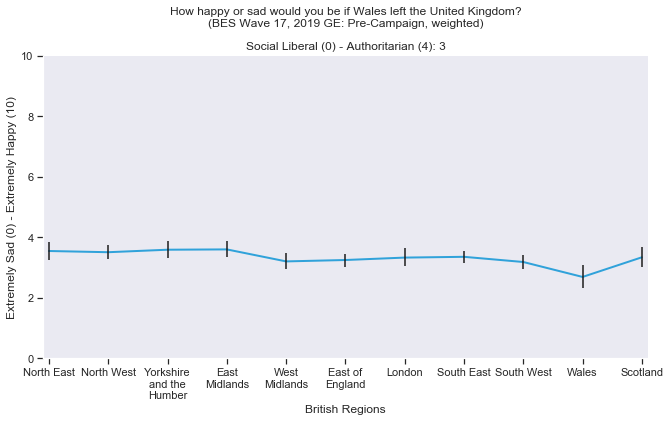
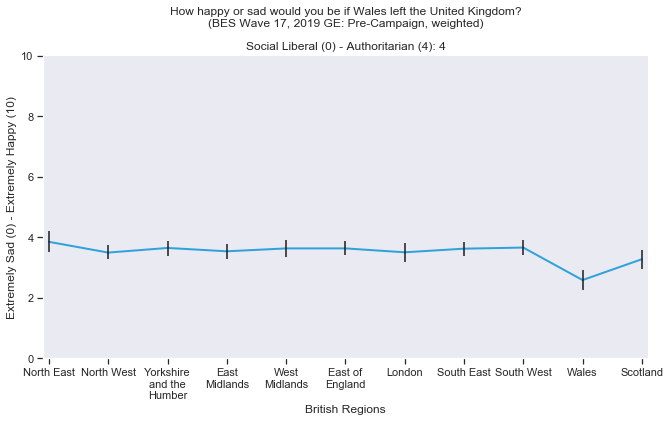

In [70]:
title = "\n".join(["How happy or sad would you be if Wales left the United Kingdom?",
                   "(BES Wave 17, "+wave_to_name.loc[17]+", weighted)"])

y_var_name = "happyWalesIndepResultScaleW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "gorW17"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [72]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'Region_by_WalesIndHappy2019_by_Auth.gif', fps=1)


In [35]:
BES_Panel["scotIndPrefAllW19"] = BES_Panel["scotIndPrefW19"]
mask = BES_Panel["scotIndPrefScotW19"].notnull()
BES_Panel.loc[mask,"scotIndPrefAllW19"] = BES_Panel.loc[mask,"scotIndPrefScotW19"]
BES_Panel["scotIndPrefAllW19"] = BES_Panel["scotIndPrefAllW19"].replace(9999,"Don't know")

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW19]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW19]   (means,lower_error,upper_error)
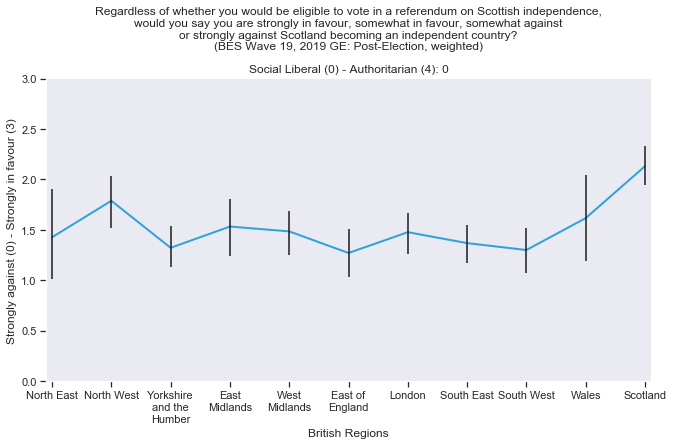
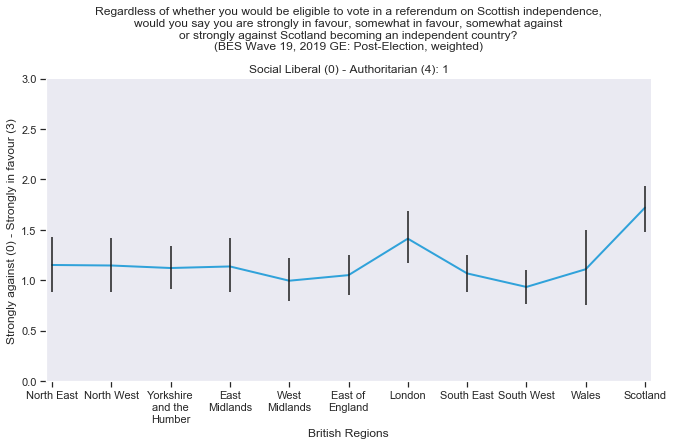
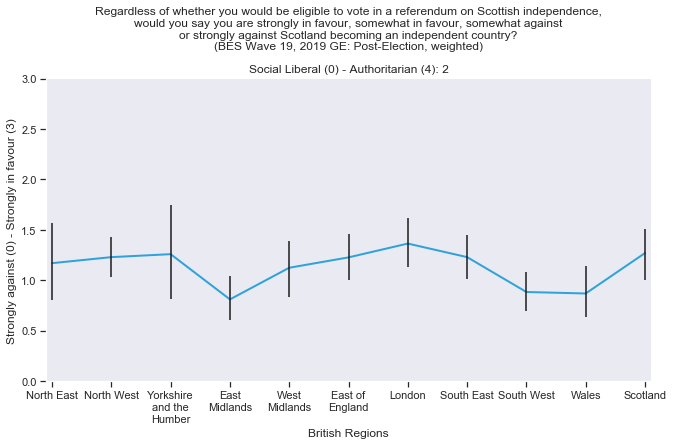
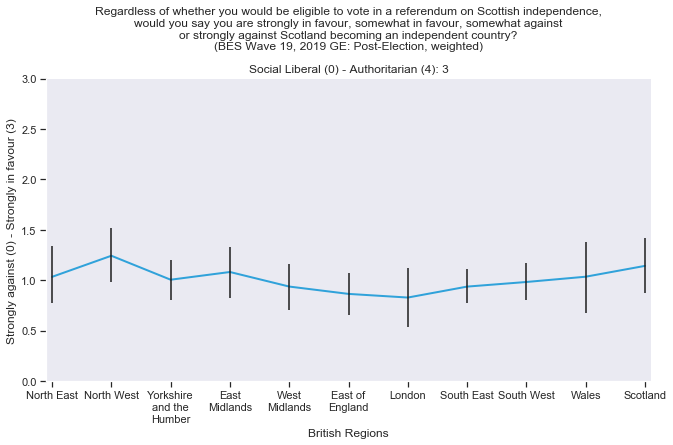
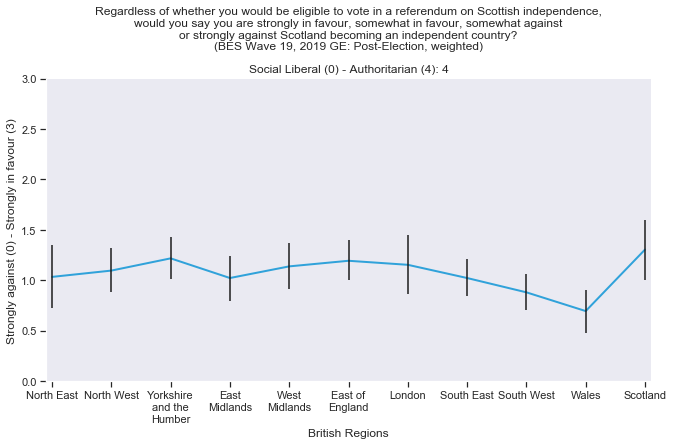

In [36]:
title = "\n".join(["Regardless of whether you would be eligible to vote in a referendum on Scottish independence,",
                   "would you say you are strongly in favour, somewhat in favour, somewhat against",
                   "or strongly against Scotland becoming an independent country?",
                   "(BES Wave 19, "+wave_to_name.loc[19]+", weighted)"])

y_var_name = "scotIndPrefAllW19"
ylabel = "\n".join(["Strongly against (0) - Strongly in favour (3)"])
    
wt_var = "wt_new_W19_result"

x_var_name = "gorW19"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [47]:
for wave in [1,2,3]:
    target_var = "scotIndepGoodEng&WalesW"+str(wave)
    eng_var = "scotIndepGoodEngW"+str(wave)
    wales_var = "scotIndepGoodWalesW"+str(wave)
    BES_Panel[target_var] = BES_Panel[eng_var]
    mask = BES_Panel[wales_var].notnull()
    BES_Panel.loc[mask,target_var] = BES_Panel.loc[mask,wales_var]

# BES_Panel["scotIndepGoodEng&WalesW1"] = BES_Panel["scotIndepGoodEngW1"]
# mask = BES_Panel["scotIndepGoodWalesW1"].notnull()
# BES_Panel.loc[mask,"scotIndepGoodEng&WalesW1"] = BES_Panel.loc[mask,"scotIndepGoodWalesW1"]

# BES_Panel["scotIndPrefAllW19"] = BES_Panel["scotIndPrefAllW19"].replace(9999,"Don't know")

In [53]:
# BES_Panel["scotIndepGoodEng&WalesW3"]

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW1]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW1]   (means,lower_error,upper_error)
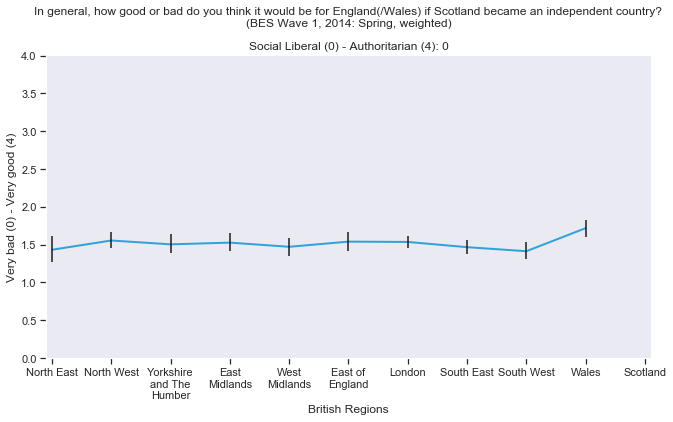
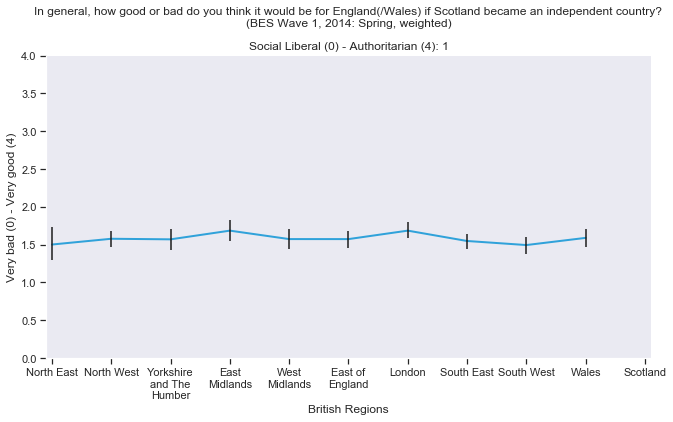
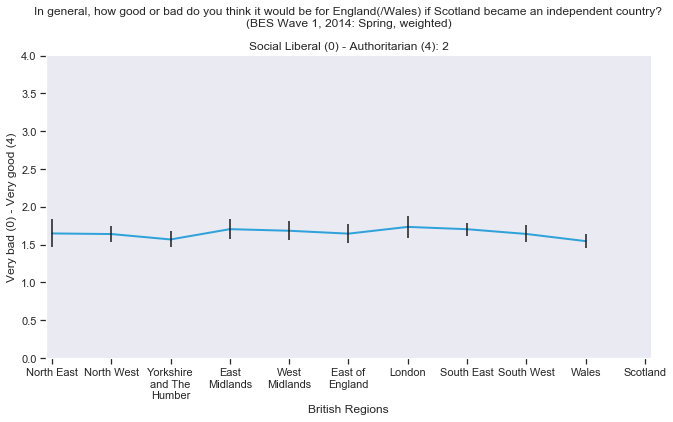
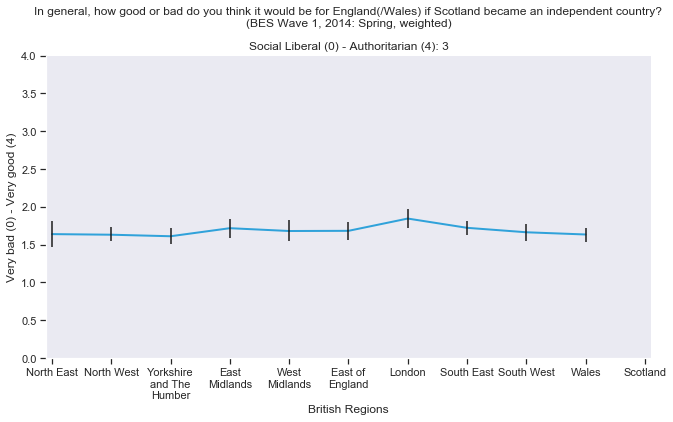
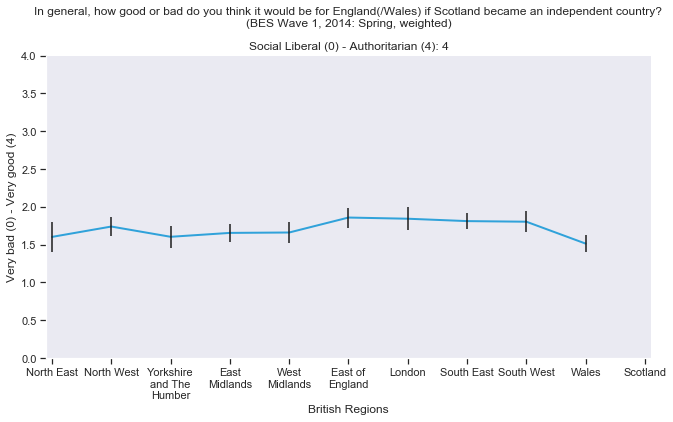

In [58]:
title = "\n".join(["In general, how good or bad do you think it would be for England(/Wales) if Scotland became an independent country?",
                   "(BES Wave 1, "+wave_to_name.loc[1]+", weighted)"])

y_var_name = "scotIndepGoodEng&WalesW1"
ylabel = "\n".join(["Very bad (0) - Very good (4)"])
    
wt_var = "wt_full_W1"

x_var_name = "gorW1"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW3]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW3]   (means,lower_error,upper_error)
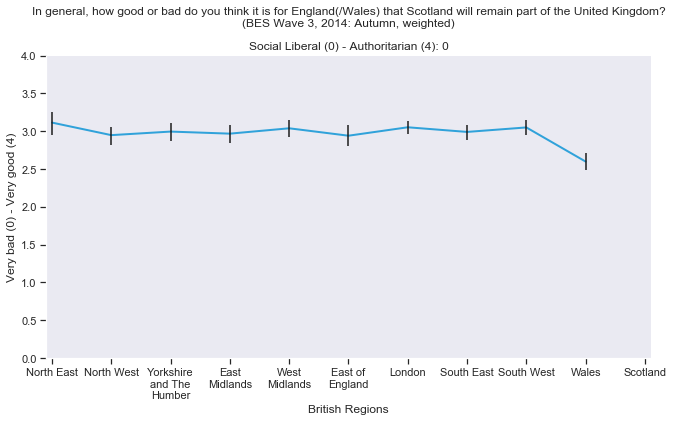
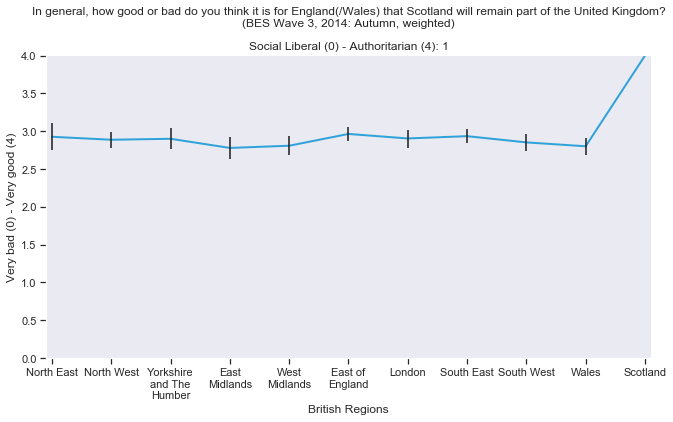
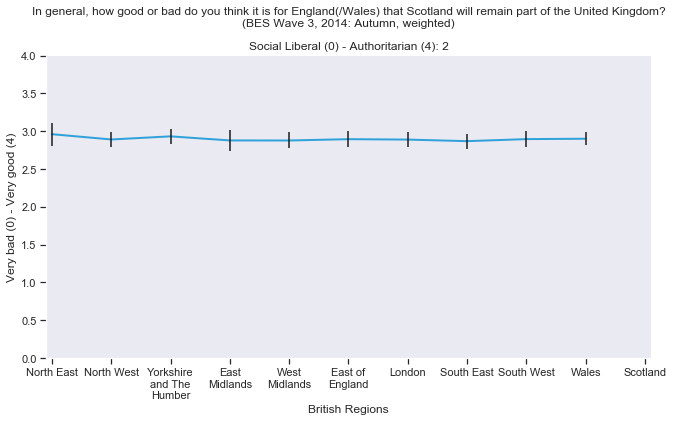
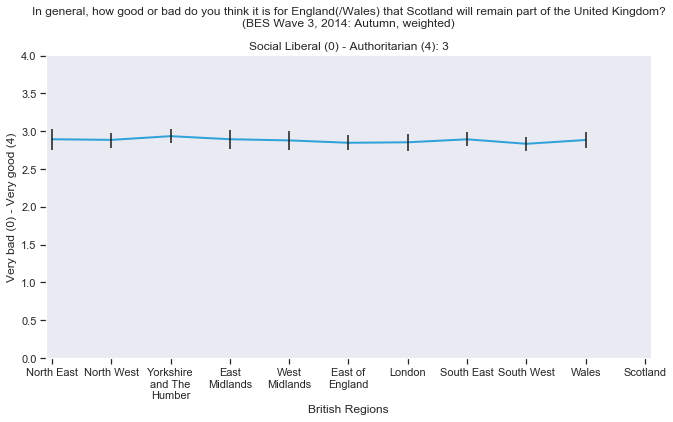
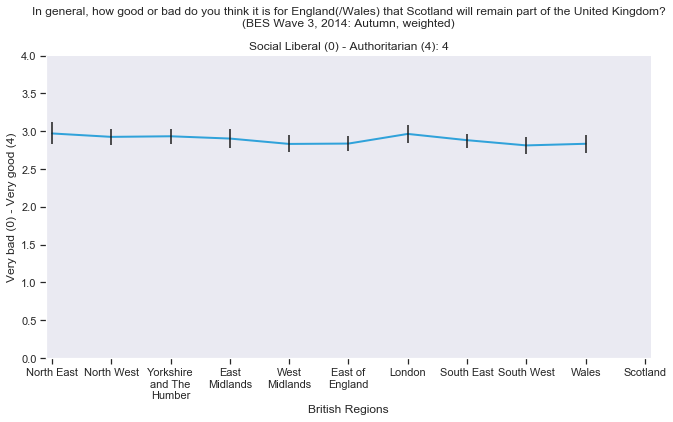

In [61]:
title = "\n".join(["In general, how good or bad do you think it is for England(/Wales) that Scotland will remain part of the United Kingdom?",
                   "(BES Wave 3, "+wave_to_name.loc[3]+", weighted)"])

y_var_name = "scotIndepGoodEng&WalesW3"
ylabel = "\n".join(["Very bad (0) - Very good (4)"])
    
wt_var = "wt_full_W3"

x_var_name = "gorW3"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [63]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'Region_by_scotIndGoodEng&WalesW3_by_Auth.gif', fps=1)


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [gorW1]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [gorW1]   (means,lower_error,upper_error)
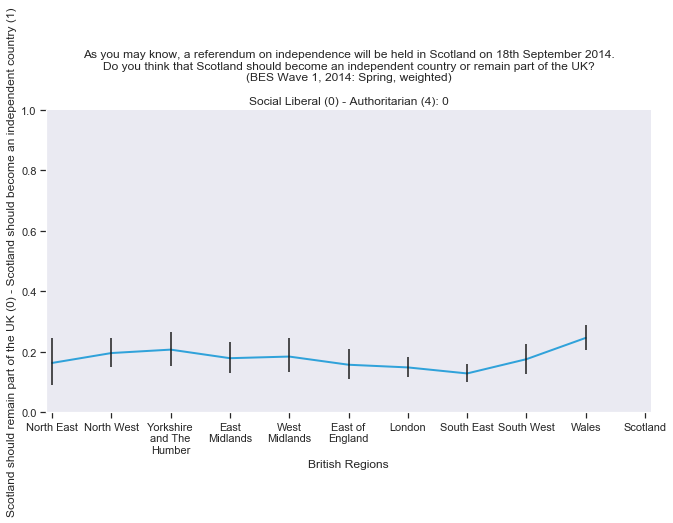
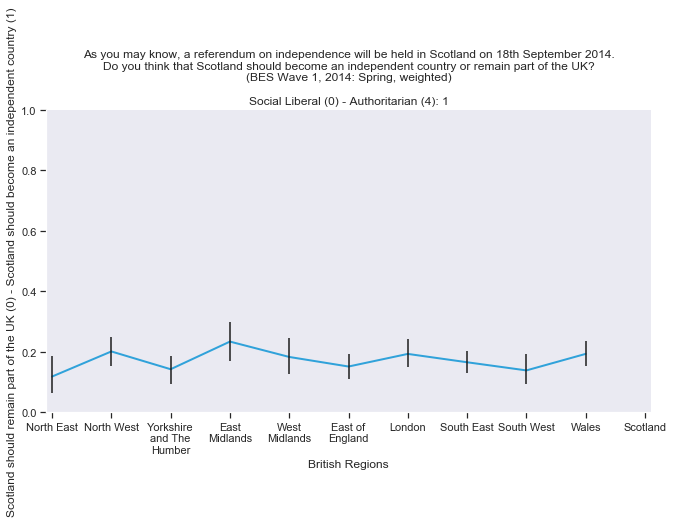
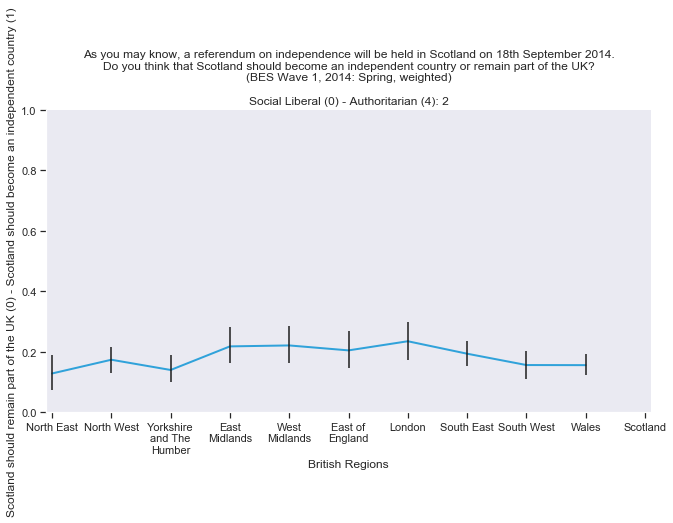
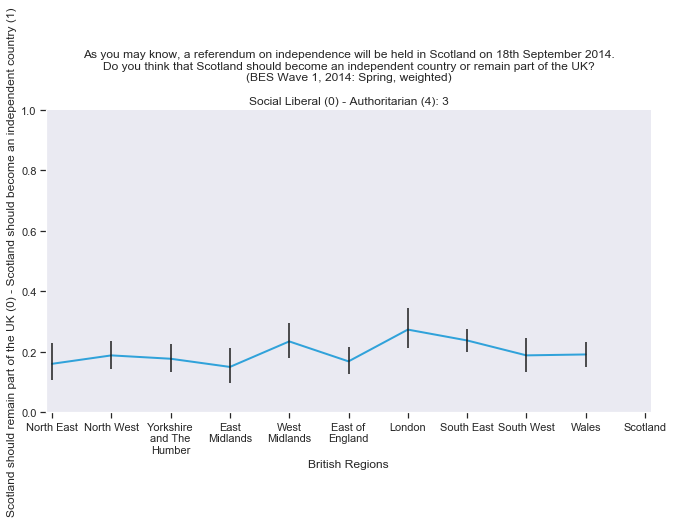
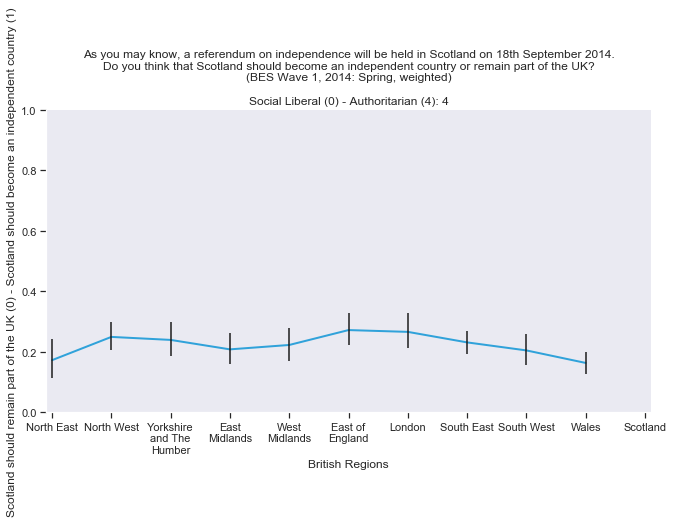

In [84]:
title = "\n".join(["As you may know, a referendum on independence will be held in Scotland on 18th September 2014.",
                   "Do you think that Scotland should become an independent country or remain part of the UK?",
                   "(BES Wave 1, "+wave_to_name.loc[1]+", weighted)"])

y_var_name = "scotReferendumOutsideW1"
ylabel = "\n".join(["Scotland should remain part of the UK (0) - Scotland should become an independent country (1)"])    
wt_var = "wt_full_W1"

x_var_name = "gorW1"
xlabel = "British Regions"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [86]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'Region_by_scotReferendumOutsideW1_by_Auth.gif', fps=1)


In [96]:
BES_Panel["p_vote_scot_ref_minusdk"] = BES_Panel["p_vote_scot_ref"].replace("Don't know",np.nan).cat.remove_unused_categories()

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [p_vote_scot_ref_minusdk]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_vote_scot_ref_minusdk]   (means,lower_error,upper_error)
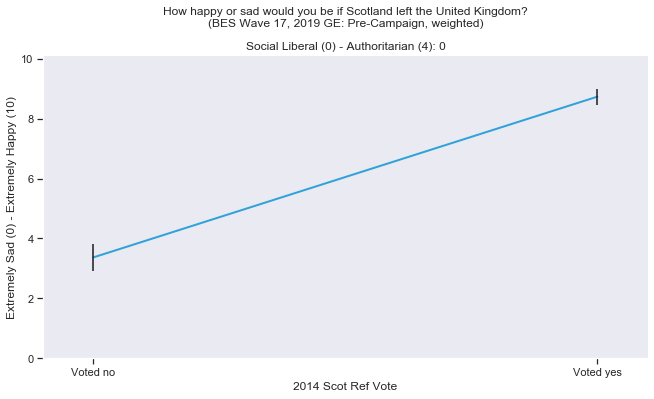
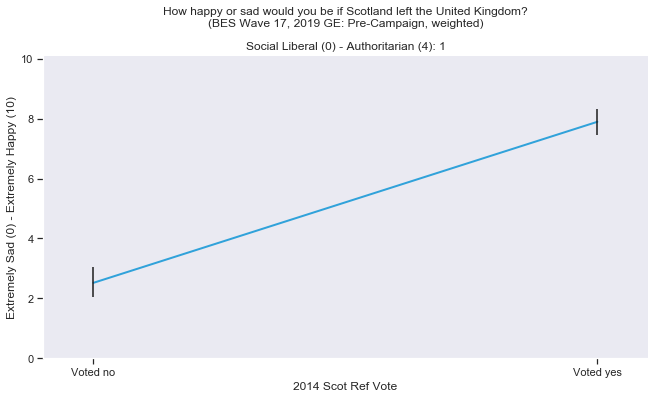
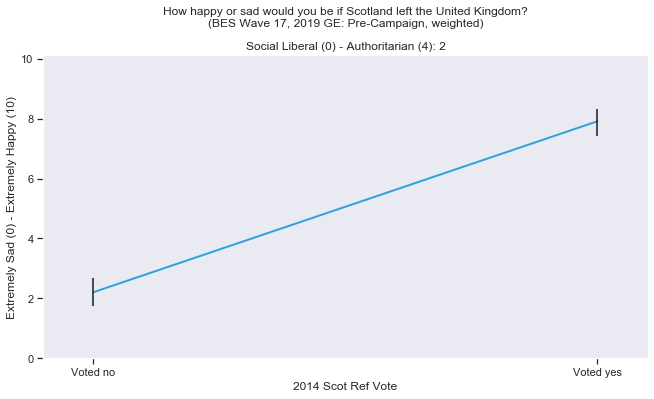
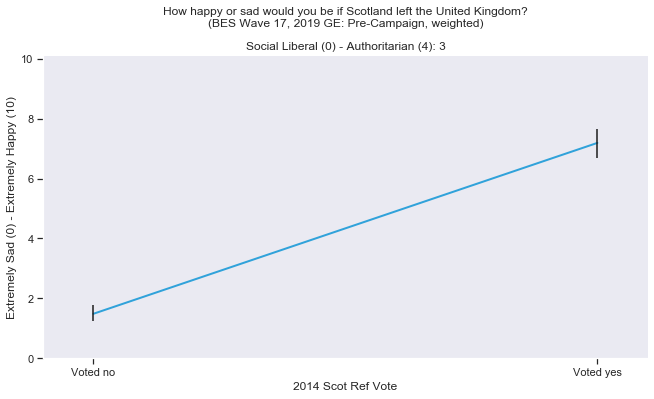
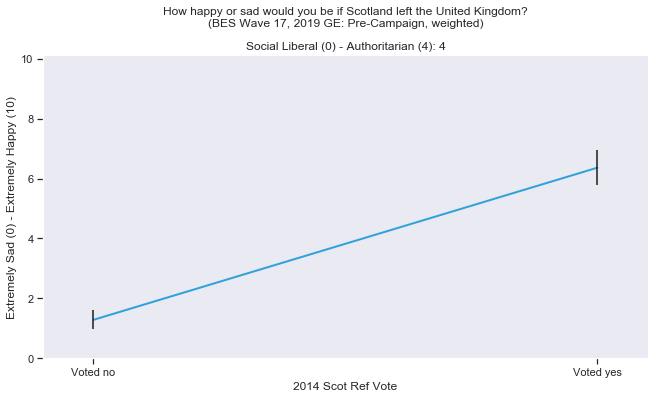

In [106]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 17, "+wave_to_name.loc[17]+", weighted)"])

y_var_name = "happyScotIndepResultW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "p_vote_scot_ref_minusdk"
xlabel = "2014 Scot Ref Vote"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [111]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'2014ScotRef_by_happyScotIndepResultW17_by_Auth.gif', fps=1)


In [104]:
BES_Panel["scotReferendumIntentionW17_minusdkwnv"] = BES_Panel["scotReferendumIntentionW17"].cat.remove_categories(["Don't know","Will not vote"])

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [scotReferendumIntentionW17_minusdkwnv]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [scotReferendumIntentionW17_minusdkwnv]   (means,lower_error,upper_error)
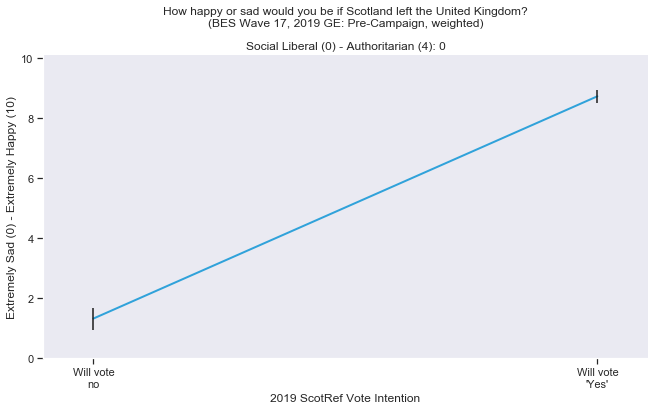
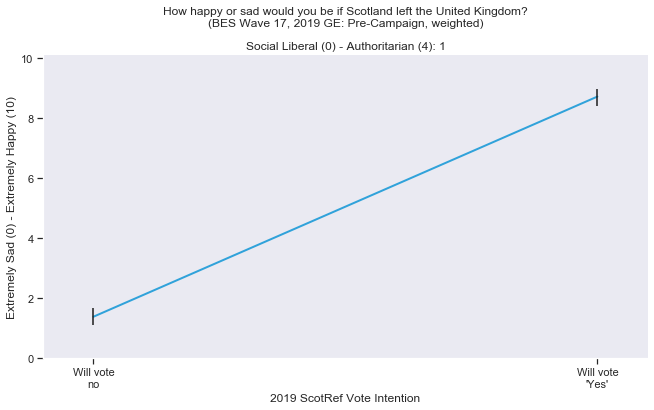
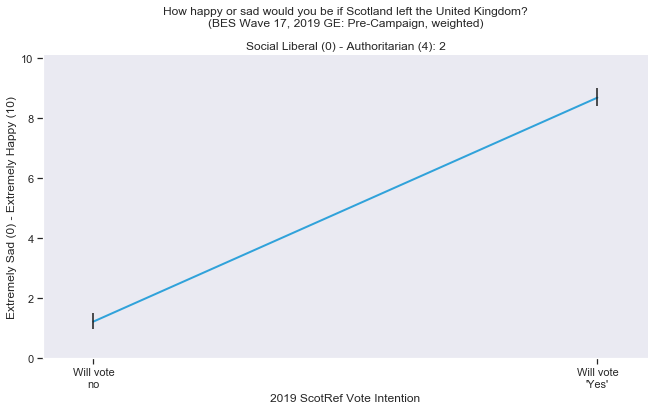
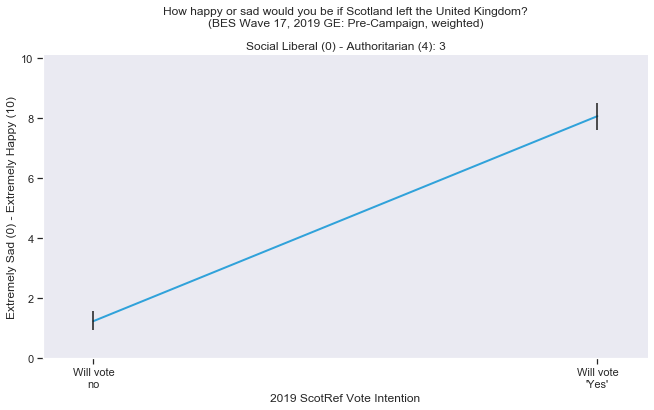
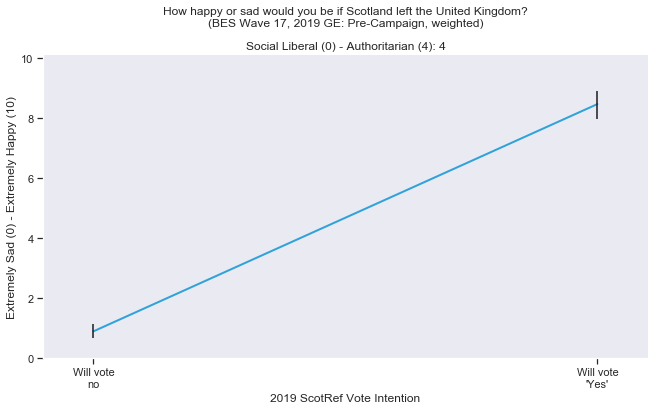

In [108]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 17, "+wave_to_name.loc[17]+", weighted)"])

y_var_name = "happyScotIndepResultW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "scotReferendumIntentionW17_minusdkwnv"
xlabel = "2019 ScotRef Vote Intention"
non_ord_indices = []

hv_dict,zlabel = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [110]:
# hv.output(hm, holomap='gif', fps=1)
# hv.save(hm, '..//BES_analysis_publications//Authoritarianism as Mediator//'+'2019ScotRefPref_by_happyScotIndepResultW17_by_Auth.gif', fps=1)


id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
98447    NaN
98448    NaN
98449    NaN
98450    NaN
98451    NaN
Name: scotReferendumIntentionW17, Length: 97006, dtype: category
Categories (2, object): [Will vote no < Will vote 'Yes']

In [99]:
search(BES_Panel,"scotref")

scotReferendumOutsideW1        24630
scotReferendumIntentionW1       5896
scotReferendumTurnoutW1         5895
scotRefExpectationW1            9386
scotRefExpectationTurnoutW1     5895
scotReferendumOutsideW2        24211
scotReferendumIntentionW2       6047
scotReferendumTurnoutW2         6046
scotRefExpectationW2            9658
scotRefExpectationTurnoutW2     6047
expectGoodConductScotRefW2      6047
scotReferendumRetroW3           5295
scotReferendumVoteW3            5080
goodConductScotRefW3            5213
scotReferendumIntentionW4       5426
scotReferendumIntentionW6       5357
scotReferendumIntentionW7       4215
scotReferendumIntentionW9       3892
scotReferendumIntentionW10      3397
scotRefIDW10                    3397
scotRefID1W10                   2937
scotRefID2W10                   2937
scotRefID3W10                   2937
scotRefID4W10                   2937
scotRefID6W10                   2937
scotRefID7W10                   2937
scotReferendumIntentionW11      3793
s

In [95]:
BES_Panel["happyScotIndepResultW17"][BES_Panel["p_vote_scot_ref"]=="Don't know"].value_counts()

Don't know                3
Extremely happy           2
8                         1
5                         1
1                         1
9                         0
7                         0
6                         0
4                         0
3                         0
2                         0
Extremely disappointed    0
Name: happyScotIndepResultW17, dtype: int64

In [ ]:
search(BES_Panel,"scotIndepGoodEng")


:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [natSecuritySelfW13]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [natSecuritySelfW13]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_058 :Curve   [x]   (y)
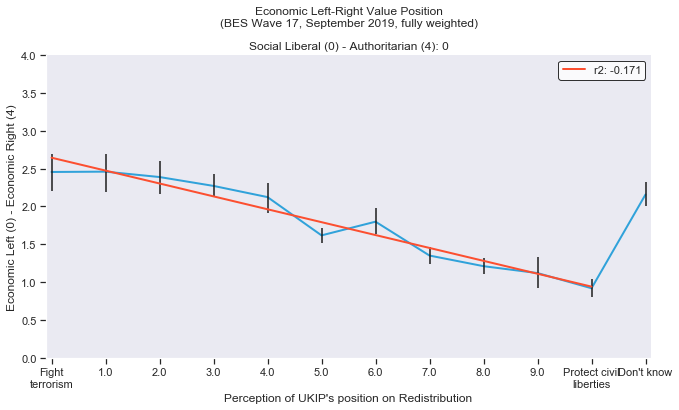
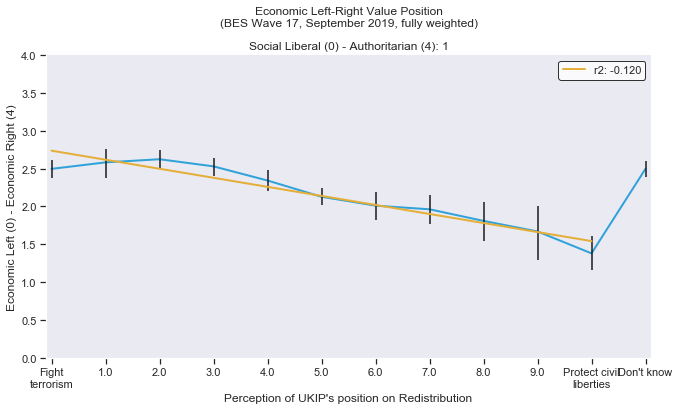
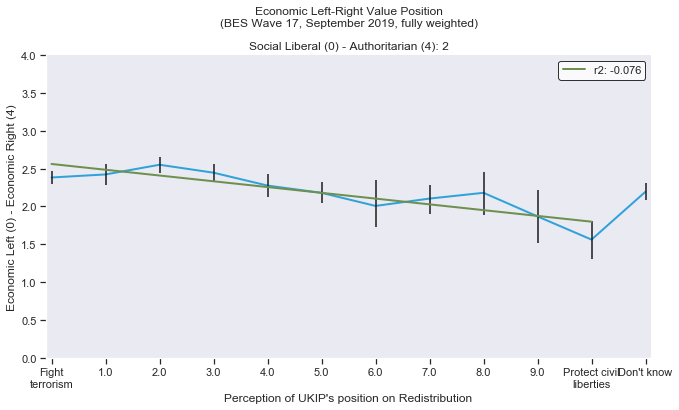
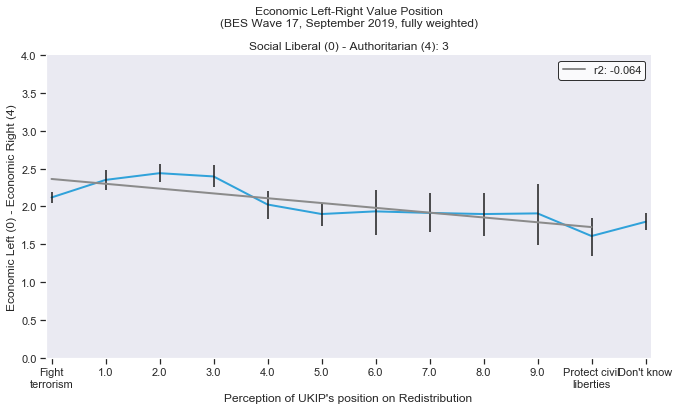
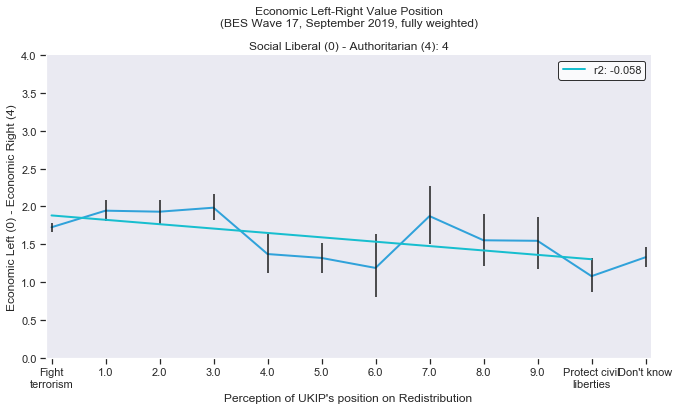

In [147]:
y_var_name = "lr"

title = "\n".join(["Economic Left-Right Value Position",
                   "(BES Wave 17, September 2019, fully weighted)"])
ylabel = "Economic Left (0) - Economic Right ("+str(q-1)+")"
wt_var = "wt_new_W13_result"

x_var_name = "natSecuritySelfW13"
xlabel = "Perception of UKIP's position on Redistribution"

# x_cat_list = ["-£5k","£5-\n10k","£10-\n15k","£15-\n20k","£20-\n25k","£25-\n30k","£30-\n35k","£35-\n40k","£40-\n45k","£45-\n50k",
# "£50-\n60k","£60-\n70k","£70-\n100k","£100-\n150k","£150k+","Don't\nknow","Pref not\nto answer"]
non_ord_indices = []

hv_dict = hol_plot_var_by_lr_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                   non_ord_indices=non_ord_indices,title=title)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [p_sexualityW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_sexualityW17]   (means,lower_error,upper_error)
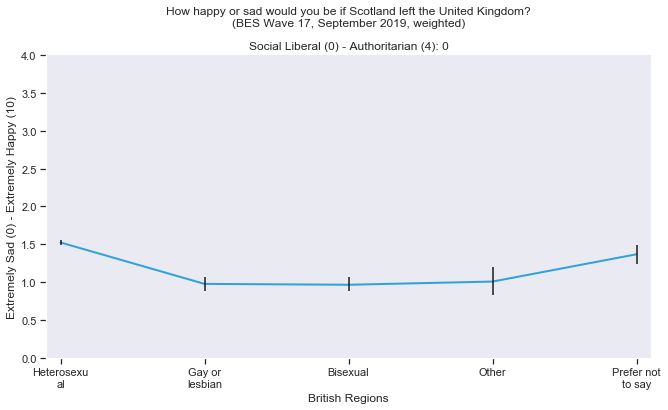
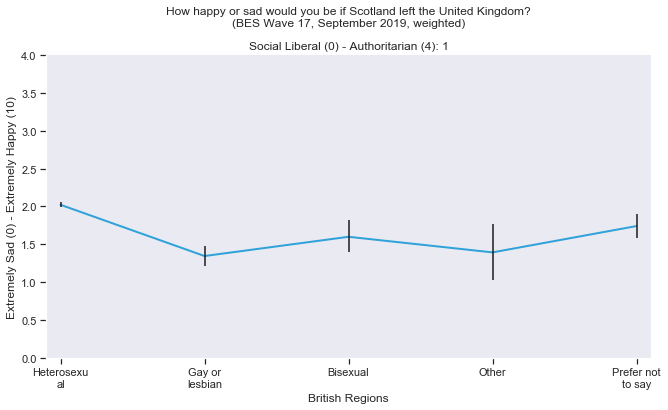
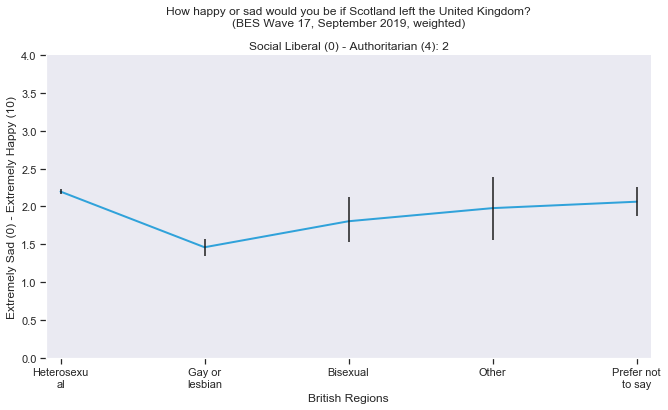
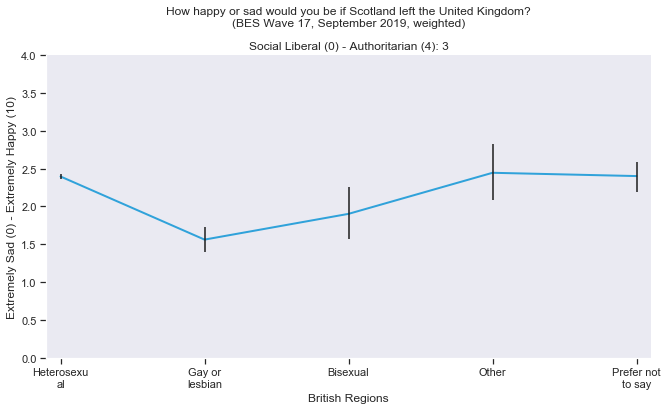
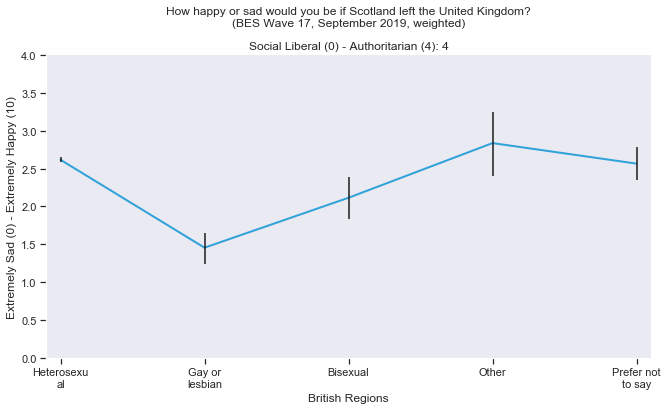

In [151]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 17, September 2019, weighted)"])

y_var_name = "gayEqualityW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "p_sexualityW17"
xlabel = "British Regions"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I     :Curve   [p_ethnicityW17]   (means,lower_error,upper_error,N)
      .ErrorBars.I :ErrorBars   [p_ethnicityW17]   (means,lower_error,upper_error)
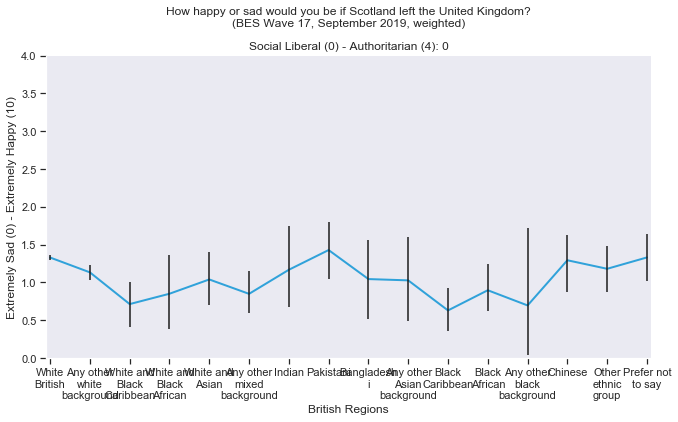
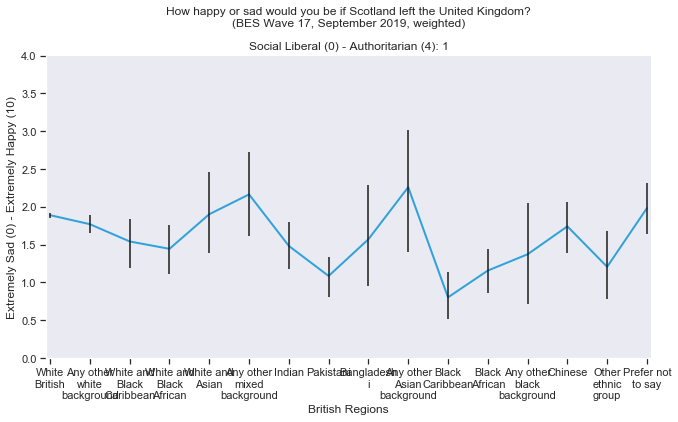
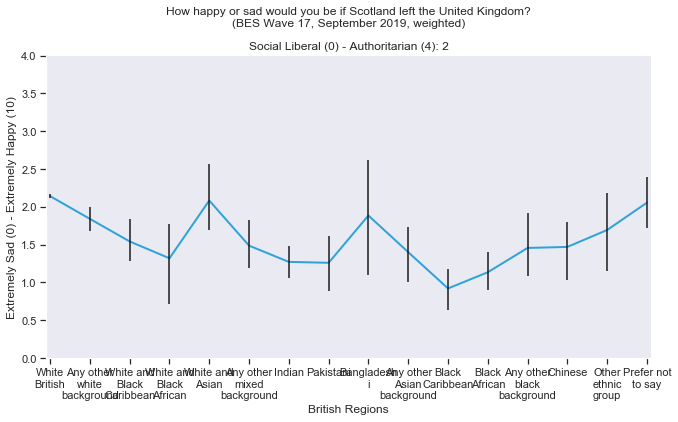
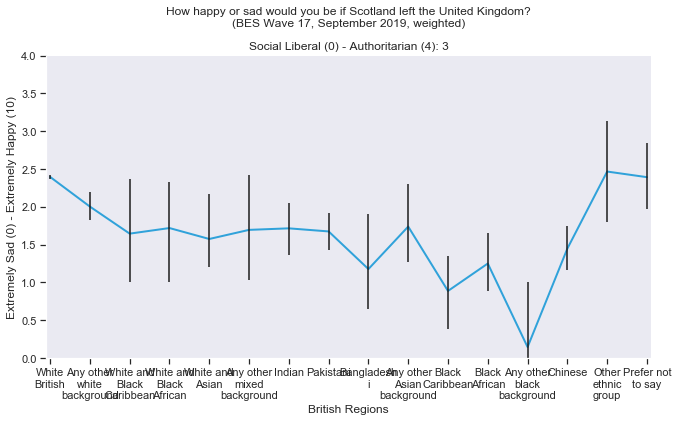
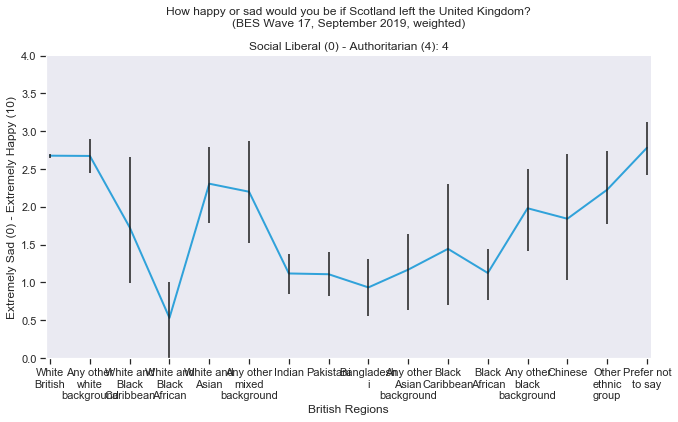

In [152]:
title = "\n".join(["How happy or sad would you be if Scotland left the United Kingdom?",
                   "(BES Wave 17, September 2019, weighted)"])

y_var_name = "blackEqualityW17"
ylabel = "\n".join(["Extremely Sad (0) - Extremely Happy (10)"])
    
wt_var = "wt_new_W17"

x_var_name = "p_ethnicityW17"
xlabel = "British Regions"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      reg_plot=False,x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [ ]:
## too many ethnic categories!

:HoloMap   [Social Liberal (0) - Authoritarian (4)]
   :Overlay
      .Curve.I                                     :Curve   [gender]   (means,lower_error,upper_error,N)
      .ErrorBars.I                                 :ErrorBars   [gender]   (means,lower_error,upper_error)
      .Curve.R2_colon_hyphen_minus_0_full_stop_354 :Curve   [x]   (y)
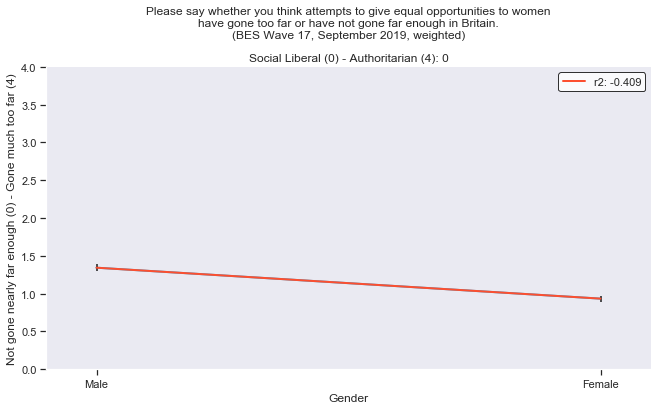
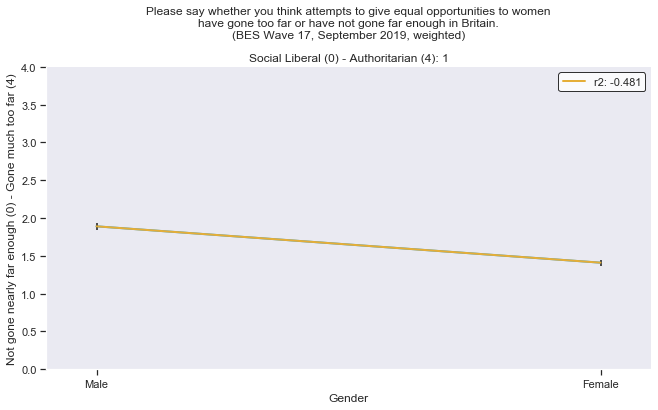
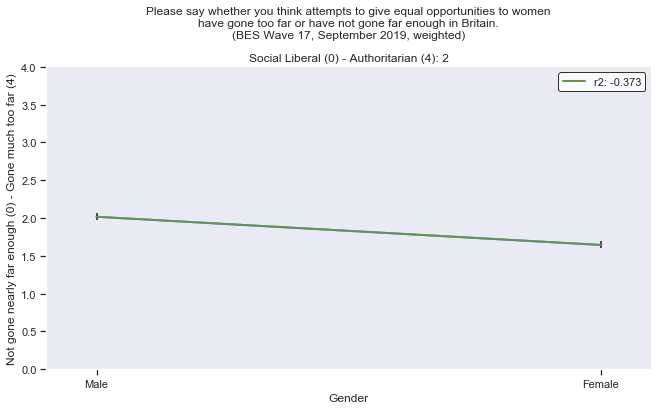
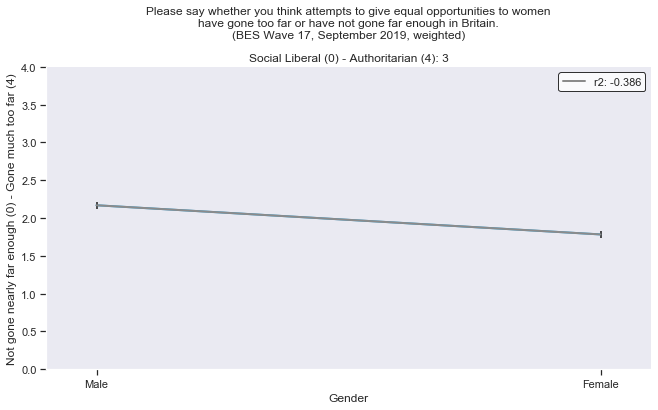
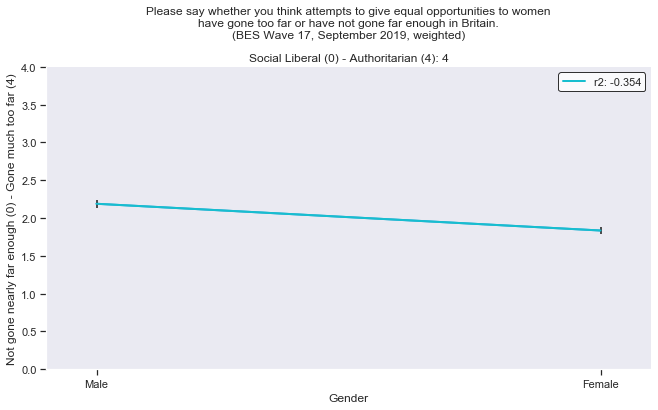

In [156]:
title = "\n".join(["Please say whether you think attempts to give equal opportunities to women",
                   "have gone too far or have not gone far enough in Britain.",
                   "(BES Wave 17, September 2019, weighted)"])

y_var_name = "womenJobsW10"
ylabel = "\n".join(["Not gone nearly far enough (0) - Gone much too far (4)"])
    
wt_var = "wt_new_W10"

x_var_name = "gender"
xlabel = "Gender"
non_ord_indices = []

hv_dict = hol_plot_var1_by_var2_by_al(x_var_name,xlabel,y_var_name,ylabel,wt_var,
                                      non_ord_indices=non_ord_indices,title=title,
                                      x_cat_text_width=10)

hv.output(backend='matplotlib',fig='png', holomap='widgets')    
hm = hv.HoloMap(hv_dict, kdims=[zlabel])
hm

In [78]:
search(BES_Panel,"scotReferendumOutside")

scotReferendumOutsideW1    24630
scotReferendumOutsideW2    24211
dtype: int64

In [40]:
BES_Panel["happyScotIndepResultNoW3"]

id
1                    NaN
2                      7
3        Extremely happy
4                    NaN
5                    NaN
              ...       
98447                NaN
98448                NaN
98449                NaN
98450                NaN
98451                NaN
Name: happyScotIndepResultNoW3, Length: 97006, dtype: category
Categories (12, object): [Extremely disappointed < 1 < 2 < 3 ... 8 < 9 < Extremely happy < Don't know]

In [146]:
#  BES_Panel["natSecuritySelfW13"]= BES_Panel["natSecuritySelfW13"].cat.rename_categories(list(map(str,BES_Panel["natSecuritySelfW13"].cat.categories)))

In [121]:
search(BES_Panel,"p_past_vote")

p_past_vote_2010    63151
p_past_vote_2005    55846
p_past_vote_2015    71128
p_past_vote_2017    60377
p_past_vote_2019    28345
dtype: int64

In [122]:
search(BES_Panel,"p_eurefvote")

p_eurefvote    70220
dtype: int64

In [125]:
ct = pd.crosstab(index = BES_Panel["p_past_vote_2019"],
            columns = BES_Panel["p_eurefvote"],
            values = BES_Panel["wt_new_W19_result"],
            aggfunc=sum,normalize='all',
           )
round(ct*100,2)

p_eurefvote                    Stay/remain in the EU  Leave the EU  Don't know
p_past_vote_2019                                                              
Conservative                                    9.04         36.62        0.11
Labour                                         24.14          6.96        0.06
Liberal Democrat                               10.15          1.58        0.01
Scottish National Party (SNP)                   2.80          0.86        0.02
Plaid Cymru                                     0.30          0.15        0.00
Green Party                                     1.72          0.77        0.01
Other                                           0.46          0.82        0.00
Brexit Party                                    0.09          2.03        0.00
Don't know                                      0.62          0.63        0.06

In [129]:
BES_Panel["likeFarageW19"].groupby(BES_Panel["p_past_vote_2019"],BES_Panel["p_eurefvote"])\
    .apply(lambda x: x.replace("Don't know",-1).cat.codes.replace(-1,np.nan))

TypeError: 'Series' objects are mutable, thus they cannot be hashed

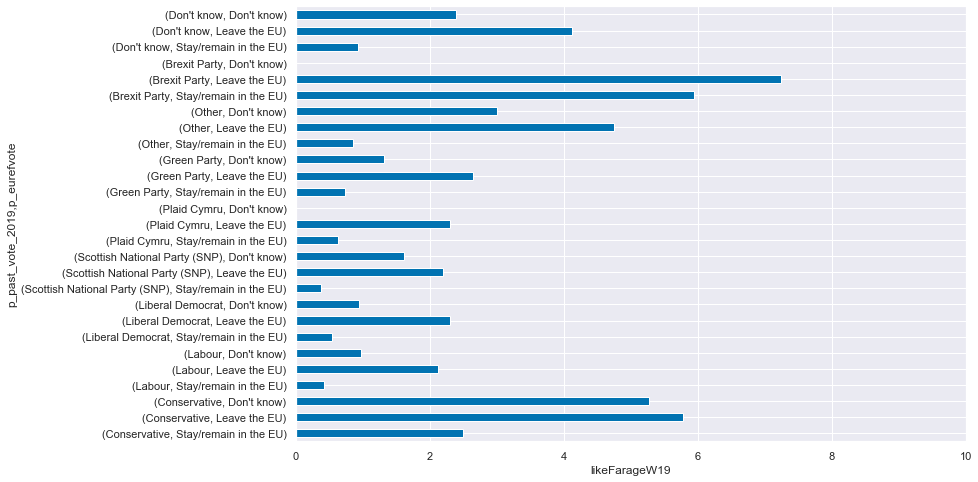

In [168]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2019"
euref_var = "p_eurefvote"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))
plt.figure(figsize=(12,8))
BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).plot(kind='barh');
plt.xlabel(like_var);
plt.xlim([0,10]);

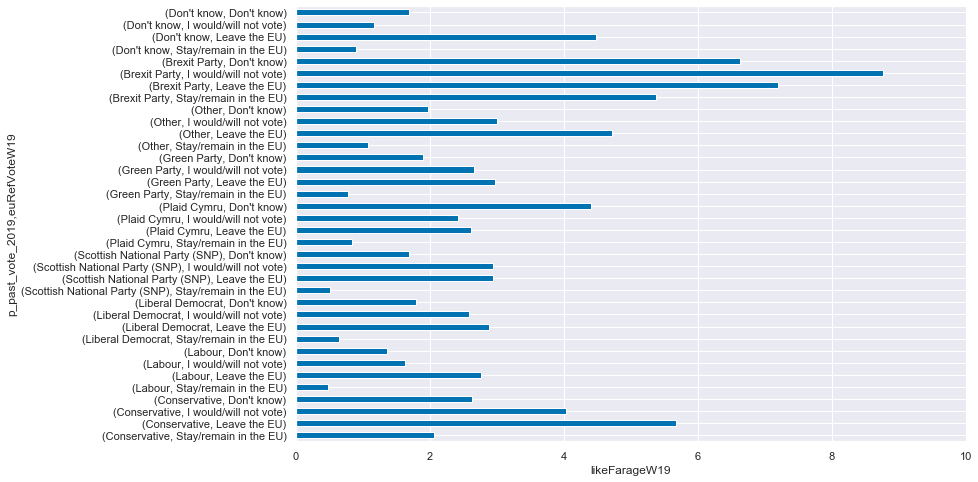

In [171]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2019"
euref_var = "euRefVoteW19"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))
plt.figure(figsize=(12,8))
BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).plot(kind='barh');
plt.xlabel(like_var);
plt.xlim([0,10]);

In [246]:
replace_dict = {"United Kingdom Independence Party (UKIP)":"UKIP",
                "British National Party (BNP)":"BNP",
                "Scottish National Party (SNP)":"SNP"}

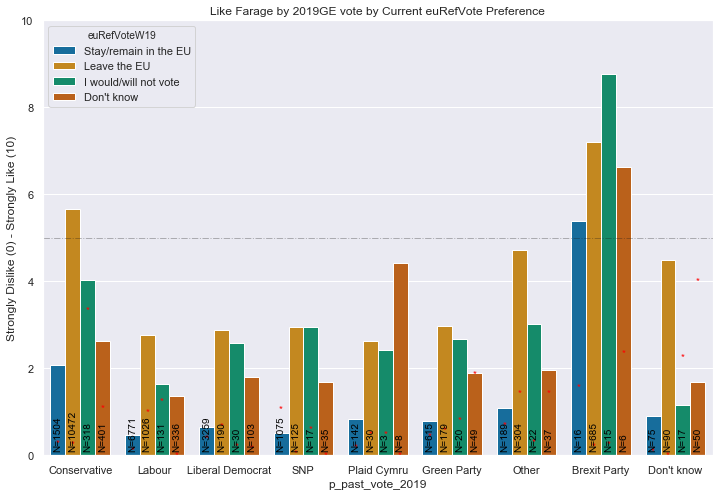

In [241]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2019"
euref_var = "euRefVoteW19"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace("Scottish National Party (SNP)","SNP")
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values
# BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1  , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Dislike (0) - Strongly Like (10)");
plt.title("Like Farage by 2019GE vote by Current euRefVote Preference");

In [242]:
# BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1)

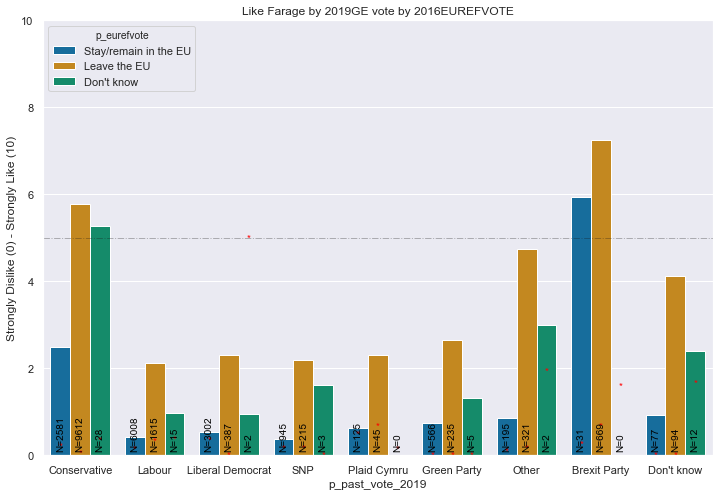

In [243]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2019"
euref_var = "p_eurefvote"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace("Scottish National Party (SNP)","SNP")
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Dislike (0) - Strongly Like (10)");
plt.title("Like Farage by 2019GE vote by 2016EUREFVOTE");

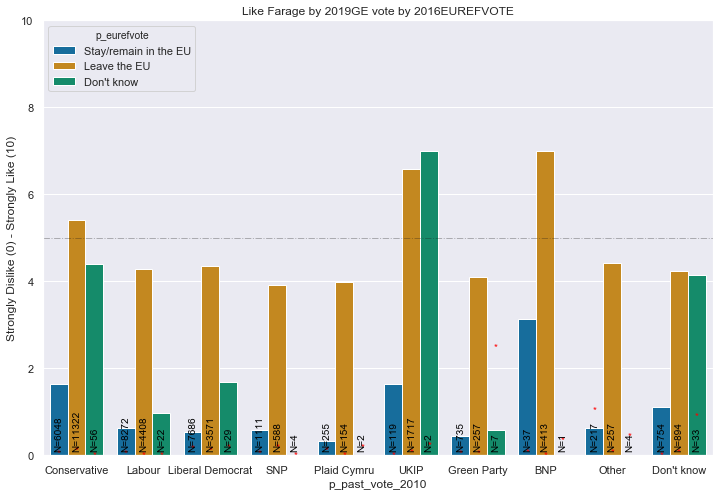

In [247]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2010"
euref_var = "p_eurefvote"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Dislike (0) - Strongly Like (10)");
plt.title("Like Farage by 2019GE vote by 2016EUREFVOTE");

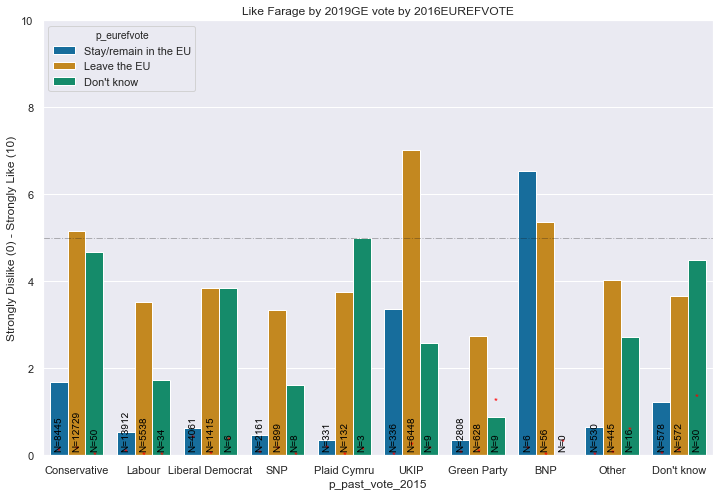

In [248]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2015"
euref_var = "p_eurefvote"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Dislike (0) - Strongly Like (10)");
plt.title("Like Farage by 2019GE vote by 2016EUREFVOTE");

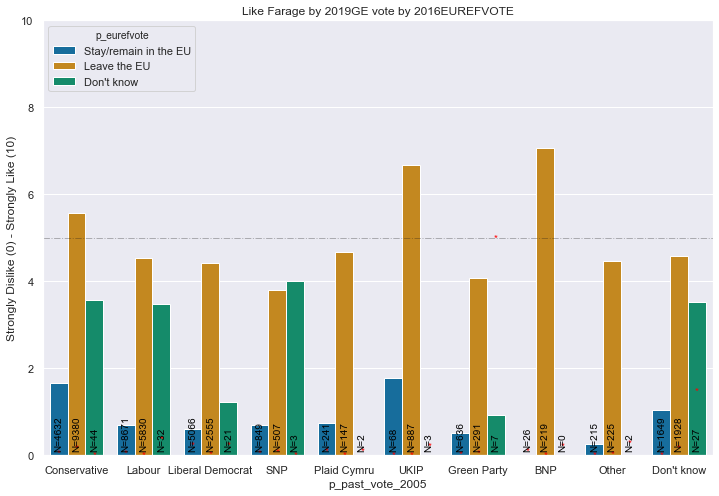

In [249]:
like_var = "likeFarageW19"
wt_var = "wt_new_W19_result"
vote_var = "p_past_vote_2005"
euref_var = "p_eurefvote"

BES_Panel[like_var+"_num_wts"] = list(zip(BES_Panel[like_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan),
                                              BES_Panel[wt_var]))

df = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].agg(weighted_mean).reset_index()
df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.barplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df);
plt.ylim([0,10]);
ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var+"_num_wts"].count().sort_index(level=1).values

Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
count = 0
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
            fontsize=10, color='red', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)
    count = count + 1
plt.ylabel("Strongly Dislike (0) - Strongly Like (10)");
plt.title("Like Farage by 2019GE vote by 2016EUREFVOTE");

In [211]:
sum(BES_Panel.groupby([vote_var,euref_var])[like_var].count().values)

26790

In [221]:
weighted_mean(BES_Panel[like_var+"_num_wts"][ (BES_Panel[vote_var]=="Green Party")
                               &(BES_Panel[euref_var]=="Leave the EU")])#.apply(lambda x: weighted_mean(x))

2.6397687583687124

In [223]:
BES_Panel.groupby([vote_var,euref_var])[like_var].count()

p_past_vote_2019               p_eurefvote          
Conservative                   Stay/remain in the EU    2581
                               Leave the EU             9612
                               Don't know                 28
Labour                         Stay/remain in the EU    6008
                               Leave the EU             1615
                               Don't know                 15
Liberal Democrat               Stay/remain in the EU    3002
                               Leave the EU              387
                               Don't know                  2
Scottish National Party (SNP)  Stay/remain in the EU     945
                               Leave the EU              215
                               Don't know                  3
Plaid Cymru                    Stay/remain in the EU     125
                               Leave the EU               45
                               Don't know                  0
Green Party                    S

In [224]:
raw_sample_sizes

array([2581, 9612,   28, 6008, 1615,   15, 3002,  387,    2,  945,  215,
          3,  125,   45,    0,  566,  235,    5,  195,  321,    2,   31,
        669,    0,   77,   94,   12], dtype=int64)

In [227]:
len(ax.patches)

27